In [1]:
import pandas as pd
import numpy as np
import csv
import random

#Vissim
import win32com.client as com
import os


#plot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [271]:
def reset_driving_behavior(ind):
    section = {'front':[102,20002],'mid':[103,20003],'end':[104,20004]}
    pname = ["W99cc0","W99cc1Distr","W99cc2","W99cc7"]
    for pn in range(len(pname)):
        if pn == 0 :
            Vissim.Net.Links.ItemByKey(section['front'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['front'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['mid'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['mid'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
            Vissim.Net.Links.ItemByKey(section['end'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
        elif pn == 1:
            Vissim.Net.Links.ItemByKey(section['front'][0]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn])
            Vissim.Net.Links.ItemByKey(section['front'][1]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn])
            Vissim.Net.Links.ItemByKey(section['mid'][0]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['mid'][1]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn+8])
            Vissim.Net.Links.ItemByKey(section['end'][1]).LinkBehavType.DrivBehavDef.W99cc1Distr.SetAttValue("Mean",ind[pn+8])
        elif pn == 2 :
            Vissim.Net.Links.ItemByKey(section['front'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['front'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['mid'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['mid'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
        elif pn == 3 :
            Vissim.Net.Links.ItemByKey(section['front'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['front'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn])
            Vissim.Net.Links.ItemByKey(section['mid'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['mid'][1]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+4])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
            Vissim.Net.Links.ItemByKey(section['end'][0]).LinkBehavType.DrivBehavDef.SetAttValue(pname[pn],ind[pn+8])
def create_vehcom(i,ref1,ref2,ref3):
    cartype = {0:Vissim.Net.VehicleTypes.ItemByKey(100),\
               1:Vissim.Net.VehicleTypes.ItemByKey(300),\
               2:Vissim.Net.VehicleTypes.ItemByKey(400)}
    reflow = [ref1,ref2,ref3]
    temp = [reflow.index(ref) for ref in reflow if ref != 0]
    if len(set(temp)) != len(temp):
        temp[2] = 2
    car = [cartype[ref] for ref in temp]
    for j in range(len(temp)):
        car.insert(j*2+1,Vissim.Net.DesSpeedDistributions.ItemByKey(40))

    Vissim.Net.VehicleCompositions.AddVehicleComposition(i,car)
    Rel_Flows = Vissim.Net.VehicleCompositions.ItemByKey(i).VehCompRelFlows.GetAll()
    for j in range(len(temp)):
        Rel_Flows[j].SetAttValue('RelFlow',reflow[temp[j]])
def set_vehinput(vehinp):
    # input rdic must be a pd.DataFrame, which contain data as follow
    # ['起點車輛數','起點小客車比例','頭城入口車輛數','頭城入口小客車比例','頭城入口車輛數','頭城入口小客車比例','宜蘭入口車輛數','宜蘭入口小客車比例']
    # define vissim vehicle input number and name, name must match the input data column names
    vdic = {1:['起點車輛數','起點小客車比例','起點大客車比例'],\
            2:['頭城入口車輛數','頭城入口小客車比例','頭城入口大客車比例'],\
            3:['頭城入口車輛數','頭城入口小客車比例','頭城入口大客車比例'],\
            4:['宜蘭入口車輛數','宜蘭入口小客車比例','宜蘭入口大客車比例']}
    idx = 101
    for k in vdic:
        i = vdic.get(k)
        for time in range(1,49):
            ref1 = vehinp.loc[time-1,i[1]]
            ref2 = vehinp.loc[time-1,i[2]]
            ref3 = 100-ref1-ref2
            if ref3 > 0:
                print(ref1,ref2,ref3)
                create_vehcom(idx,ref1,ref2,ref3)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),idx)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')
                idx += 1
            elif ref2 == 0 and ref3 != 0:
                print(ref1,ref2,ref3)
                create_vehcom(idx,ref1,ref2,ref3)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),idx)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')
                idx += 1
            else:
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),ref1)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')

def set_vehroute(routeratio):
    # input rdic must be a pd.DataFrame, which contain data as follow 
    # ['頭城小客車未下匝道比例','頭城大客車未下匝道比例','宜蘭小客車未下匝道比例','宜蘭大客車未下匝道比例']
    # define vissim vehicle route number and name, name must match the input data column names
    rdic = {4:'頭城小客車未下匝道比例',5:'頭城大客車未下匝道比例',6:'頭城聯結車未下匝道比例',\
            1:'宜蘭小客車未下匝道比例',2:'宜蘭大客車未下匝道比例',3:'宜蘭聯結車未下匝道比例'}
    for k in rdic:
        i = rdic.get(k)
        for time in range(1,49):
            SVRD_number = k # SVRD = Static Vehicle Routing Decision
            new_relativ_flow = routeratio.loc[time-1,i]
            # set keep drinving main line vehicle proportion
            Vissim.Net.VehicleRoutingDecisionsStatic.ItemByKey(SVRD_number).VehRoutSta.ItemByKey(1)\
                .SetAttValue('RelFlow(%s)'%str(time), new_relativ_flow)
            # set leaving highway vehicle proportion
            Vissim.Net.VehicleRoutingDecisionsStatic.ItemByKey(SVRD_number).VehRoutSta.ItemByKey(2)\
                .SetAttValue('RelFlow(%s)'%str(time), 1 - new_relativ_flow)

In [313]:
def mape(train,test):
    result = (abs(train-test)/train).mean()
    return result

def load_vissim_data():
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for j in range(1,len(Vissim.Net.DataCollectionMeasurements.GetAll())+1):
        temp1 = []
        temp2 = []
        for i in range(1,43):
            i = str(i)
            a = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("Vehs(Current,%s,All)"%i)
            b = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("SpeedAvgArith(Current,%s,All)"%i)
            if b != None:
                b = round(b,2)
            temp1.append(a)
            temp2.append(b)
        df1[j] = temp1
        df2[j] = temp2
    return df1, df2
def plot_heat(data,start,end):
    #set plot elements
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.title('Speed Diagram', fontsize=32, fontweight ='bold')
    plt.xlabel('Mileage', fontsize=16, fontweight ='bold')
    plt.ylabel('Time', fontsize=16, fontweight ='bold')
    #create color palette
    colors = ['indigo','red','orangered','orange','gold','yellow','yellowgreen','green','mediumblue']
    cm = matplotlib.colors.ListedColormap(colors)
    #set color threshould
    nm = matplotlib.colors.BoundaryNorm([0,20,40,50,60,70,80,90,100,150], cm.N)

    #plot pcolormesh
    #psm = plt.pcolormesh(data, cmap=plt.cm.gist_rainbow)
    psm = plt.pcolormesh(data, cmap=cm,norm=nm)
    fig.colorbar(psm, shrink=0.5, aspect=5)
    '''
    xticks function
    ticks should be position of indexes of the labels
    labels argument takes the list of label values
    rotation takes how the label should be presented in the plot'''
    plt.xticks(ticks = range(0,data.shape[1]), labels = data.columns, rotation=45)
    ticks = np.arange(data.index.min(), data.index.max(), 12)
    if start%12 != 0 or end%12 != 0:
        ticks = np.arange(data.index.min(), data.index.max(), 6)
        labels = [start/12 + i/2 for i in range(ticks.size)]
    else: labels = [i for i in range(start//12,start//12+ticks.size)]
    plt.yticks(ticks, labels)
    plt.show()

# Call Vissim

In [342]:
Vissim = com.Dispatch("Vissim.Vissim") 
Vissim.LoadNet(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\No5_validation.inpx")

In [131]:
#best solution of GA experiment 5
ind = [1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.2, 4.37, 0.64]

In [ ]:
ind = [1.50, 2.20, 4.00, 0.25,\
       1.08, 2.54, 3.70, 0.96,\
       2.23, 2.52, 4.97, 0.77,\
       2.69, 2.55, 4.37, 0.64]

# 2020/11/14 Validation

In [323]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114\20201114fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114\20201114scal.csv")

In [201]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,1068.0,96,4,390.0,85,15,588.0,100,0
1,1836.0,89,11,258.0,93,7,636.0,100,0
2,1596.0,89,11,198.0,97,3,540.0,96,4
3,1164.0,94,6,336.0,95,5,528.0,100,0
4,948.0,92,8,252.0,98,2,768.0,94,6
5,1188.0,94,6,306.0,98,2,384.0,100,0
6,1524.0,97,3,378.0,95,5,624.0,77,23
7,1500.0,94,4,258.0,98,2,588.0,98,2
8,1428.0,97,3,222.0,97,3,972.0,96,4
9,1572.0,98,2,432.0,94,6,744.0,94,6


In [202]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.90,1.00,0.0,0.74,0.75,0.0
1,0.79,0.80,0.0,0.82,0.94,0.0
2,0.76,1.00,0.0,0.73,0.93,0.0
3,0.84,1.00,0.0,0.68,0.00,0.0
4,0.83,0.50,0.0,0.49,1.00,0.0
5,0.86,0.00,0.0,0.81,1.00,0.0
6,0.77,1.00,0.0,0.83,1.00,0.0
7,0.75,0.14,0.0,0.71,1.00,1.0
8,0.76,0.43,0.0,0.69,1.00,0.0
9,0.78,0.75,0.0,0.71,1.00,0.0


In [203]:
set_vehinput(vehinp)
set_vehroute(routeratio)

94 4 2
91 7 2
93 6 1
89 10 1
87 12 1
88 10 2
81 17 2
84 15 1


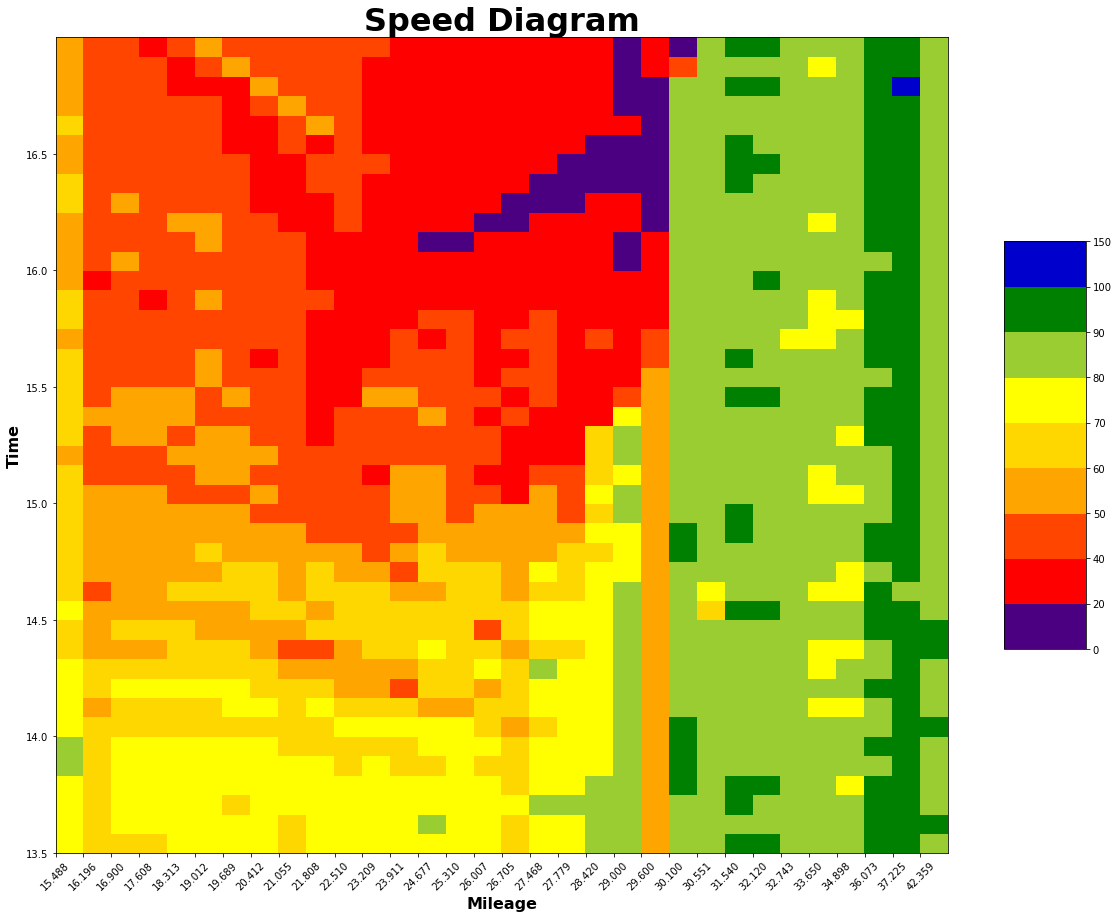

In [324]:
plot_heat(S,162,198)

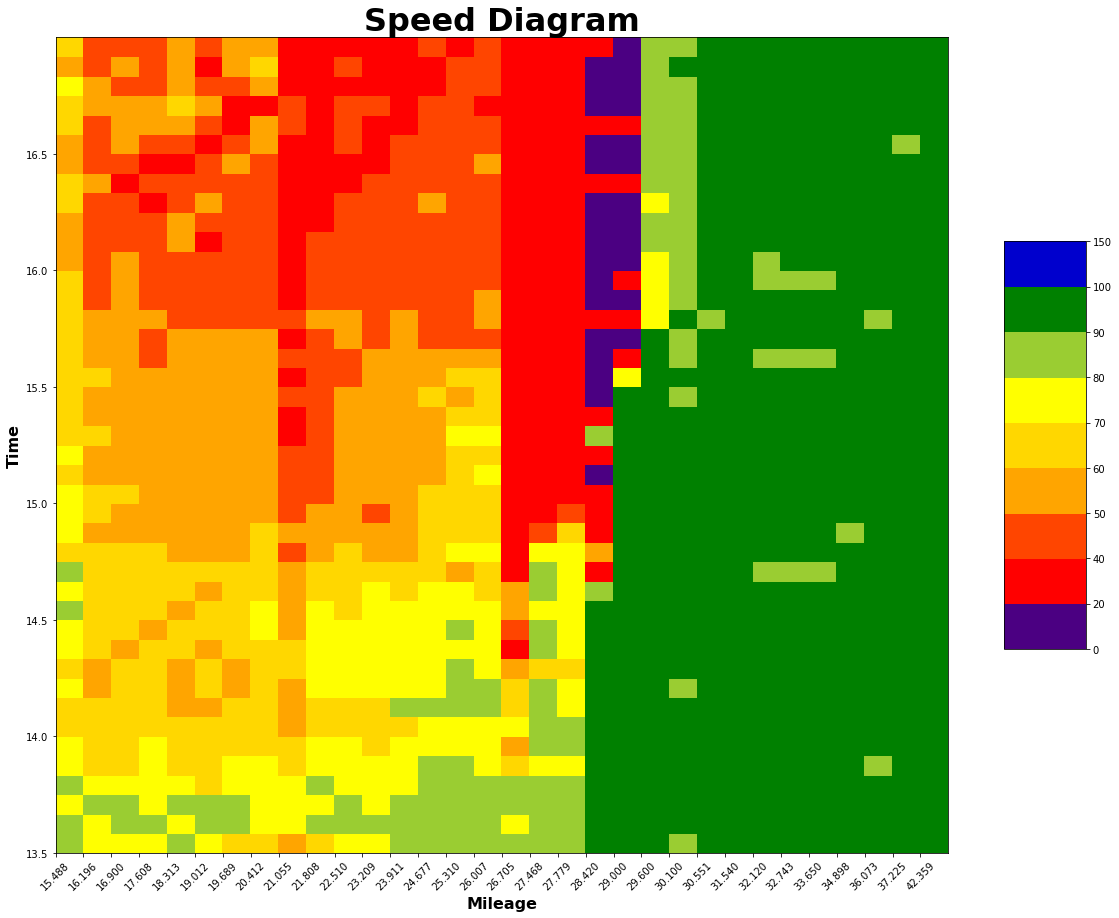

,0,1
15.488,9.82,8.37
16.196,12.96,14.05
16.900,11.47,12.17
17.608,11.13,11.34
18.313,10.08,12.74
19.012,10.23,9.94
19.689,9.49,9.91
20.412,9.98,16.91
21.055,9.94,11.05
21.808,9.50,18.39


In [171]:
ind = [1.08,2.2,3.7,0.96,1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]

Random_Seed = (50)
Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.Simulation.RunContinuous()

f, s = load_vissim_data()
f.columns = F.columns
s.columns = S.columns
F_mean = round(mape(F,f),4)*100
S_mean = round(mape(S,s),4)*100
plot_heat(s,162,204)
pd.concat([F_mean,S_mean],axis=1)

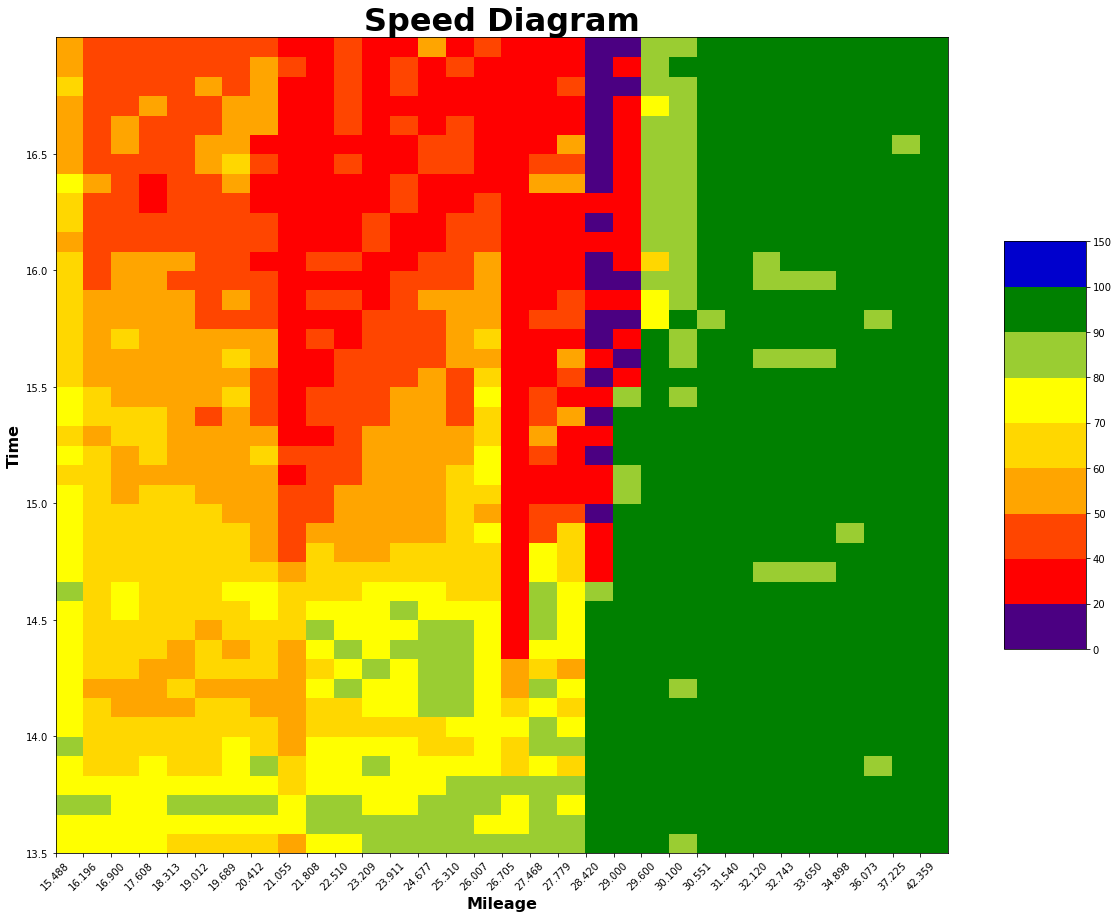

,0,1
15.488,10.17,7.10
16.196,13.23,14.99
16.900,12.10,12.98
17.608,12.45,14.51
18.313,11.06,11.37
19.012,10.36,9.33
19.689,9.92,16.17
20.412,10.52,11.65
21.055,9.25,13.87
21.808,9.79,15.34


In [170]:
ind = [1.5,2.2,4.0,0.25,1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]

Random_Seed = (50)
Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.Simulation.RunContinuous()

f, s = load_vissim_data()
f.columns = F.columns
s.columns = S.columns
F_mean = round(mape(F,f),4)*100
S_mean = round(mape(S,s),4)*100
plot_heat(s,162,204)
pd.concat([F_mean,S_mean],axis=1)

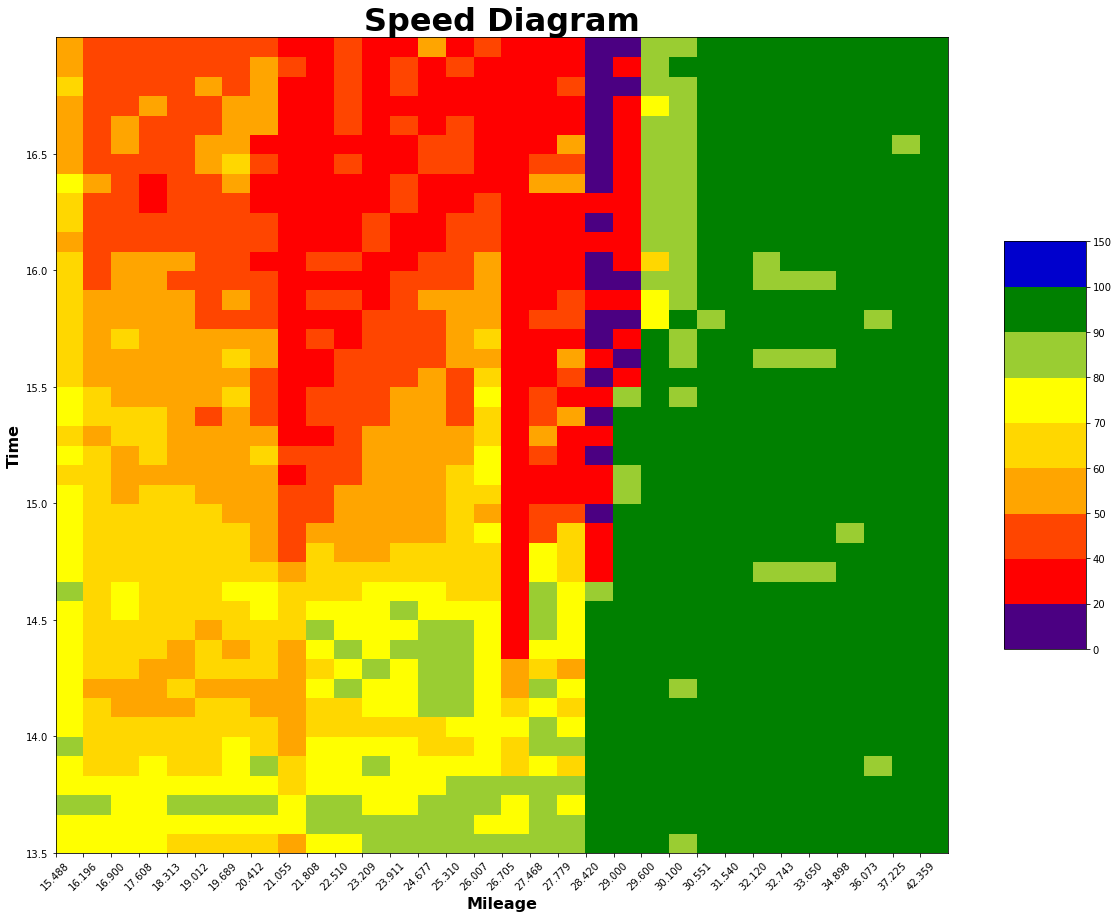

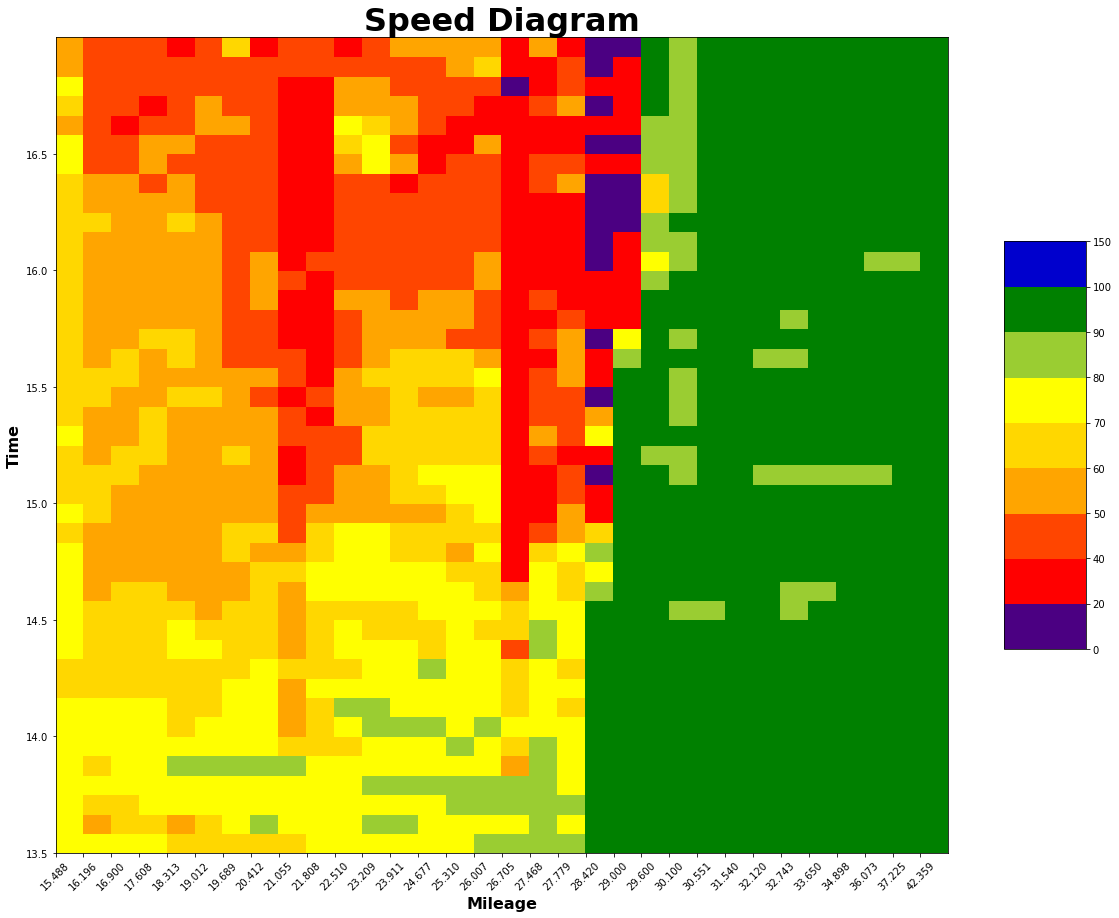

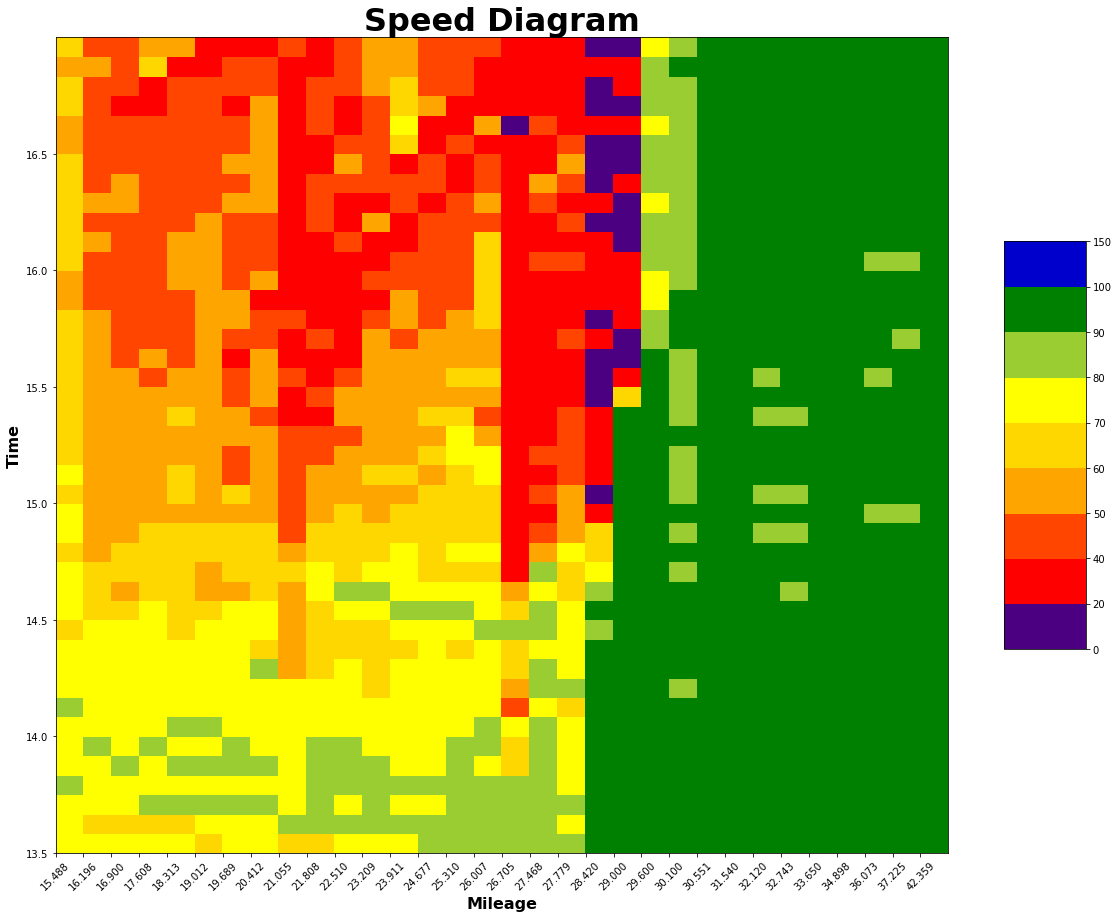

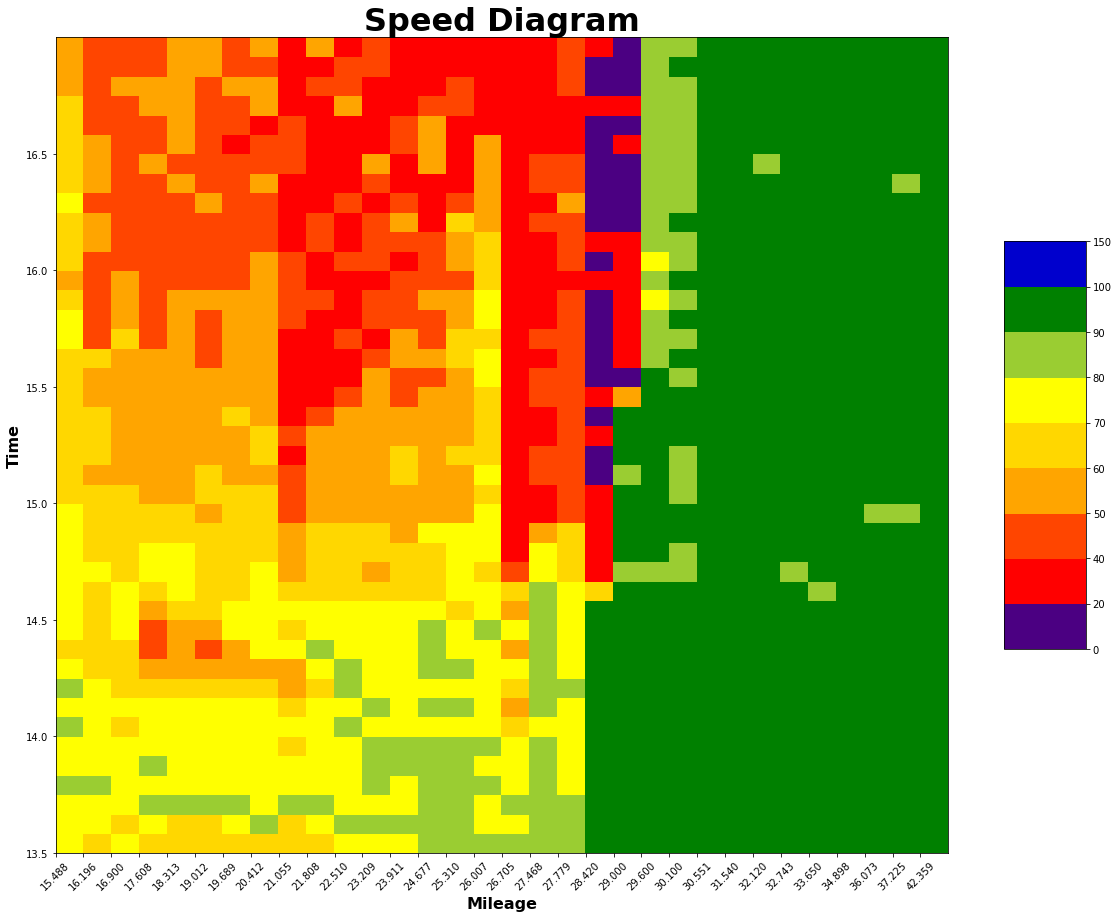

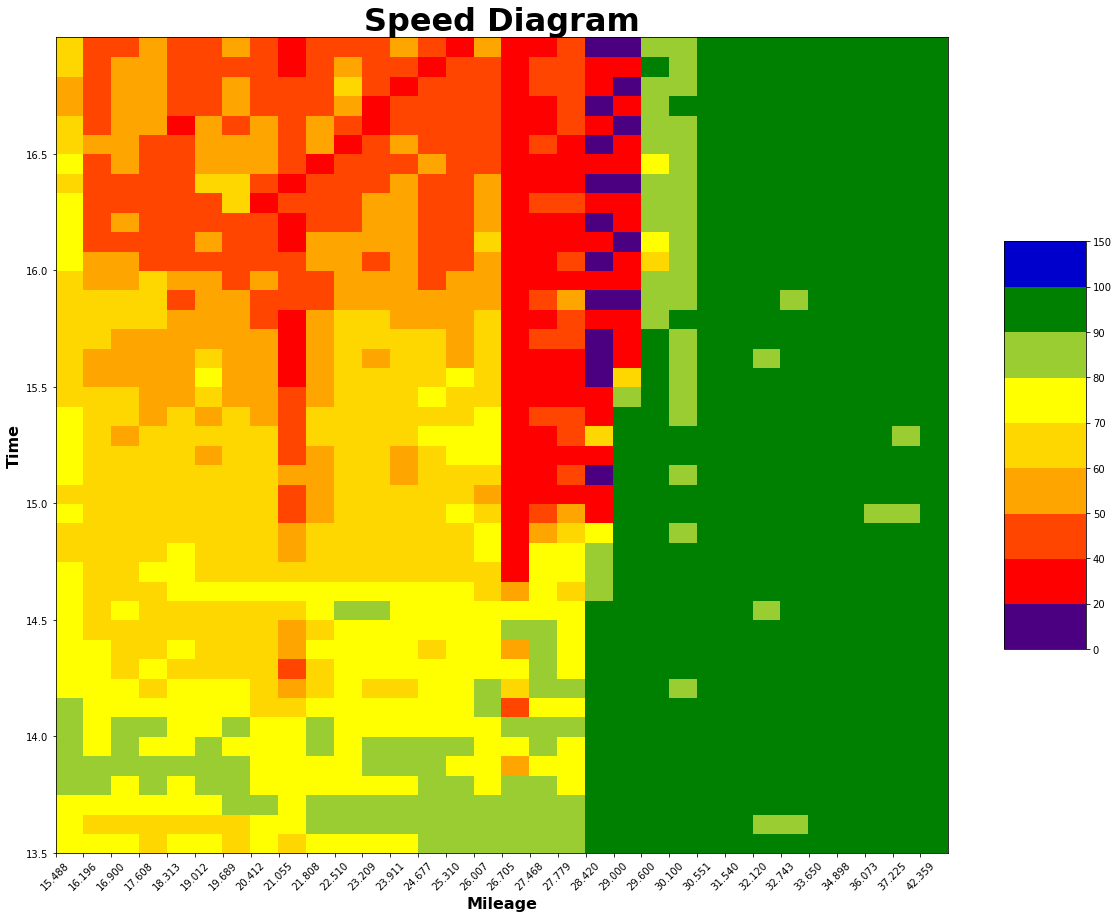

In [207]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,162,204)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [ ]:
# simrun 26-30
#ind = [1.5, 2.25, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

In [208]:
# simrun 26-30
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,10.17,7.10,8.50,9.22,8.39,7.17,9.50,7.66,10.17,9.77
16.196,13.23,14.99,10.70,15.85,10.94,14.35,10.98,15.40,11.24,19.62
16.900,12.10,12.98,8.24,12.50,8.56,9.90,9.71,12.81,10.11,16.64
17.608,12.45,14.51,8.49,15.47,9.07,13.62,9.59,13.42,10.39,19.74
18.313,11.06,11.37,10.56,16.46,9.27,11.17,10.68,16.61,9.91,14.74
19.012,10.36,9.33,9.54,9.88,9.57,10.63,9.64,9.66,9.77,15.09
19.689,9.92,16.17,8.53,11.92,7.76,13.44,8.86,14.15,7.84,18.30
20.412,10.52,11.65,8.64,11.71,8.64,16.75,10.22,18.10,9.62,16.50
21.055,9.25,13.87,8.97,10.01,8.24,12.00,9.01,10.49,9.41,10.49
21.808,9.79,15.34,8.94,12.80,7.26,13.56,9.98,15.89,9.07,26.66


In [206]:
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.55, 4.37, 0.64]
exp

,0,1
15.488,10.61,9.79
16.196,12.57,11.35
16.900,12.28,10.32
17.608,11.48,11.49
18.313,10.60,10.64
19.012,10.06,8.78
19.689,10.34,14.19
20.412,10.41,16.41
21.055,10.35,11.57
21.808,9.59,17.92


# 2020/11/15 Validation

In [237]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115\20201115fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115\20201115scal.csv")

In [238]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,1164.0,96,4,228.0,68,32,552.0,96,4
1,1236.0,88,12,222.0,95,5,588.0,96,4
2,1140.0,87,13,174.0,93,7,612.0,100,0
3,1176.0,95,5,168.0,100,0,816.0,96,4
4,1176.0,95,5,156.0,100,0,552.0,98,2
5,1104.0,96,4,132.0,95,5,624.0,88,12
6,984.0,95,2,216.0,94,6,744.0,100,0
7,912.0,93,7,318.0,96,4,576.0,100,0
8,1140.0,95,5,216.0,94,6,864.0,100,0
9,1512.0,98,2,198.0,100,0,1104.0,98,2


In [239]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.76,0.56,0.0,0.75,1.00,0.0
1,0.86,1.00,0.0,0.85,0.83,0.0
2,0.84,0.38,0.0,0.78,0.67,0.0
3,0.94,0.75,0.0,0.88,0.60,0.0
4,0.92,0.70,0.0,0.90,1.00,0.0
5,0.85,1.00,0.0,0.69,1.00,0.0
6,0.86,1.00,0.0,0.73,1.00,1.0
7,0.94,1.00,0.0,0.70,0.80,0.0
8,0.79,0.50,0.0,0.77,0.60,0.0
9,0.84,0.00,0.0,0.88,1.00,0.0


In [240]:
set_vehinput(vehinp)
set_vehroute(routeratio)

95 2 3
95 3 2
97 1 2
89 10 1
91 8 1
93 6 1
98 0 2
86 12 2
91 8 1
99 0 1
99 0 1


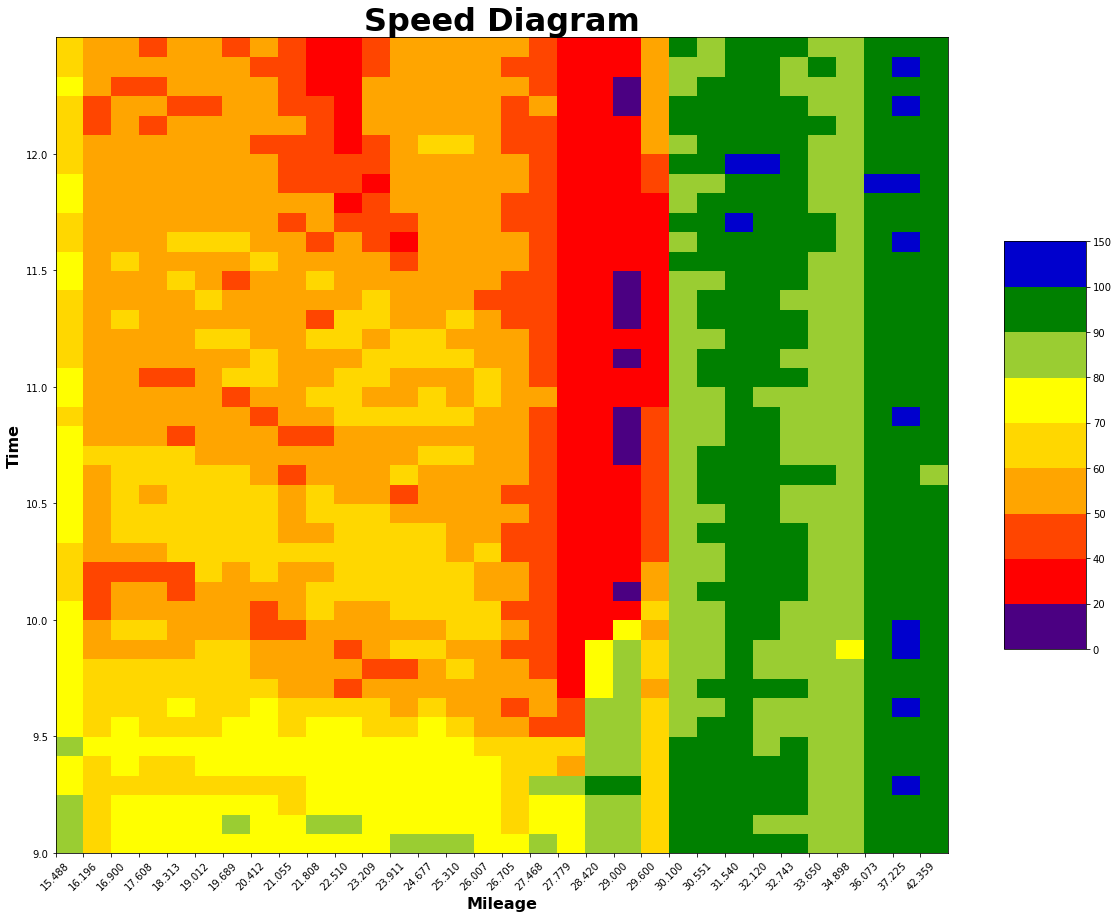

In [241]:
plot_heat(S,108,150)

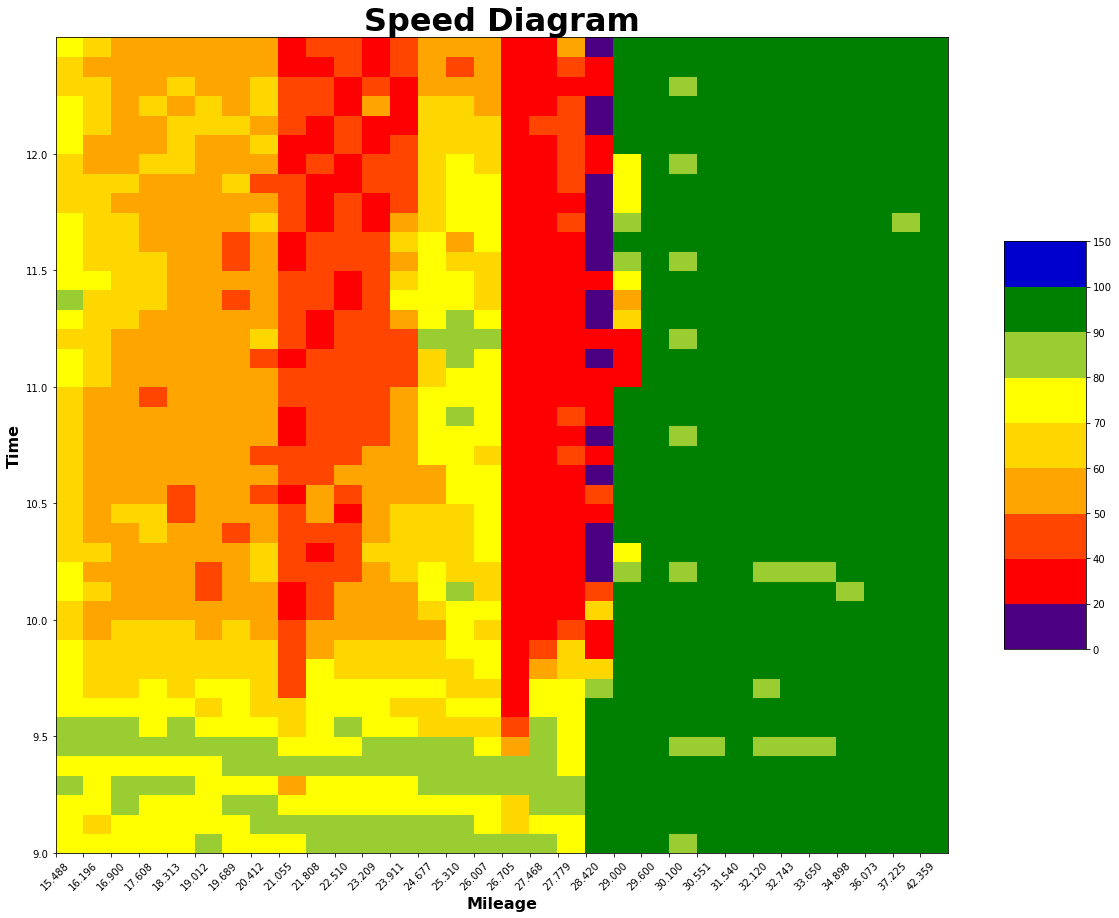

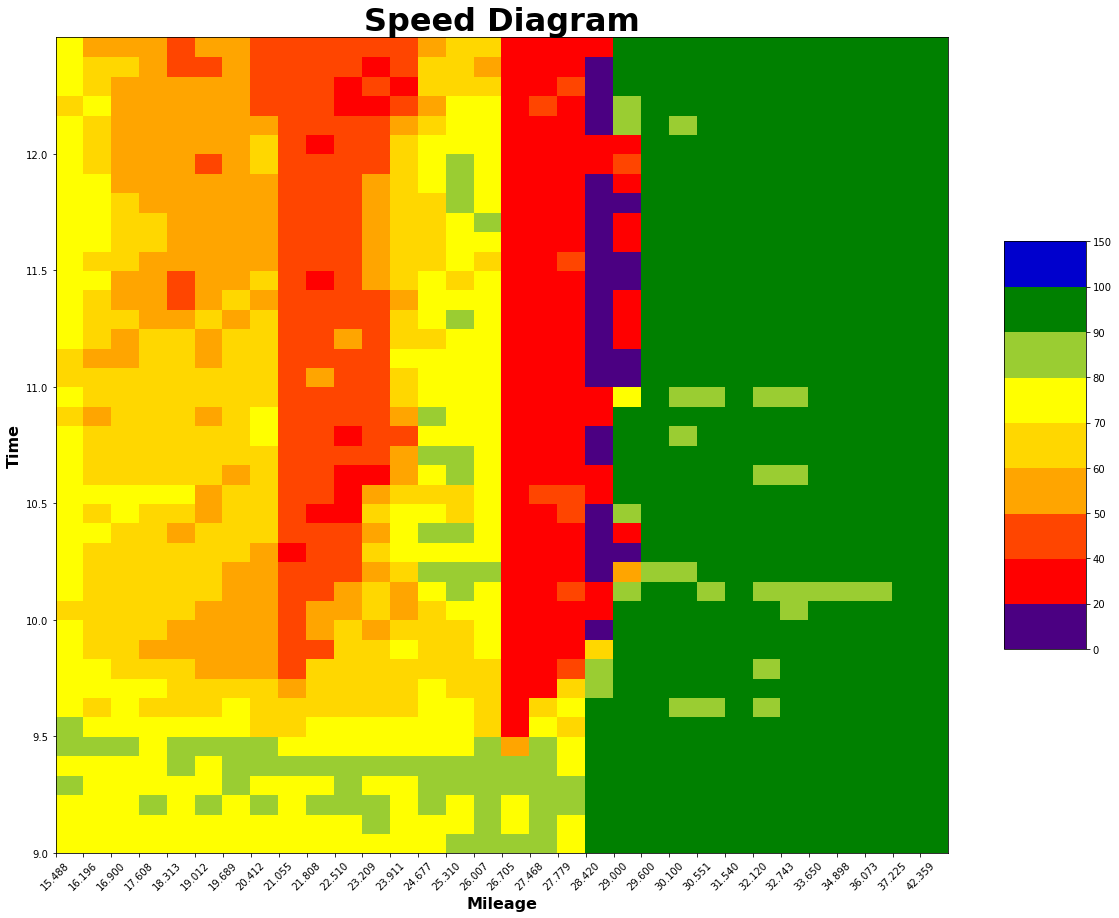

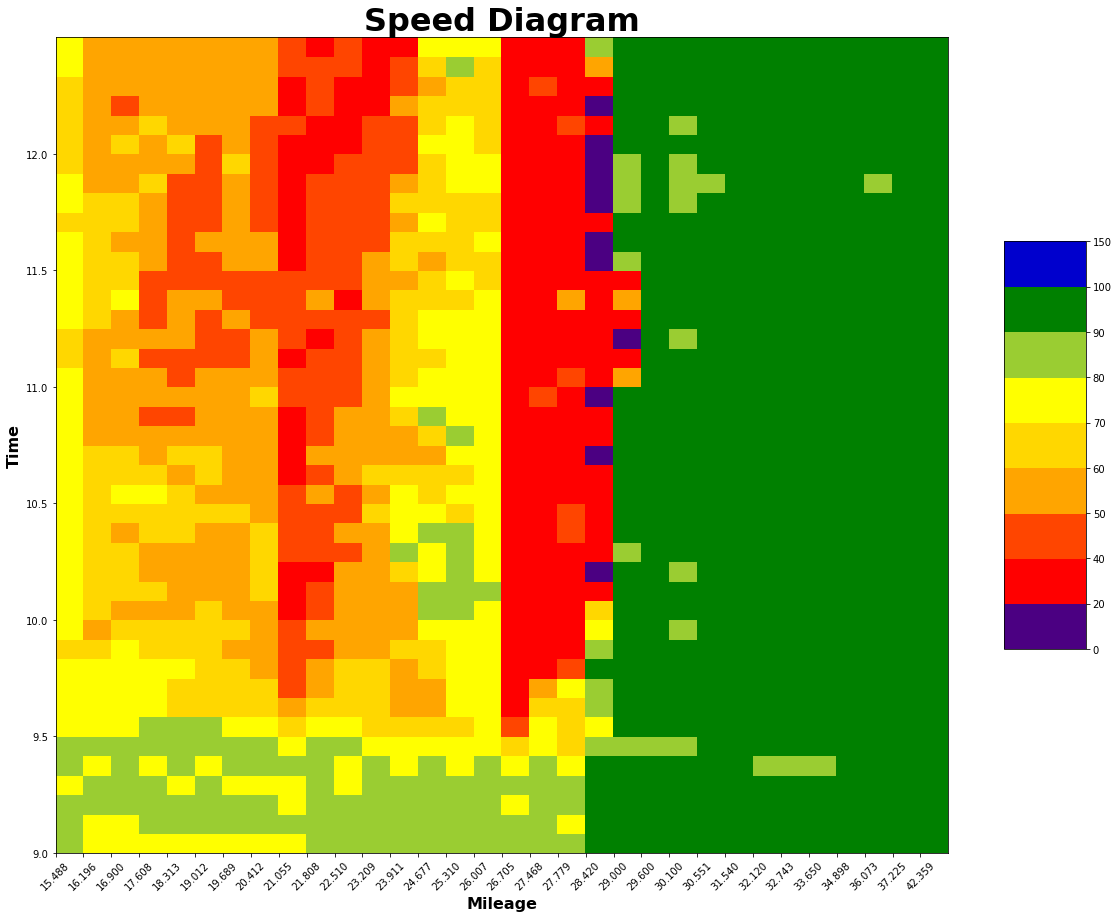

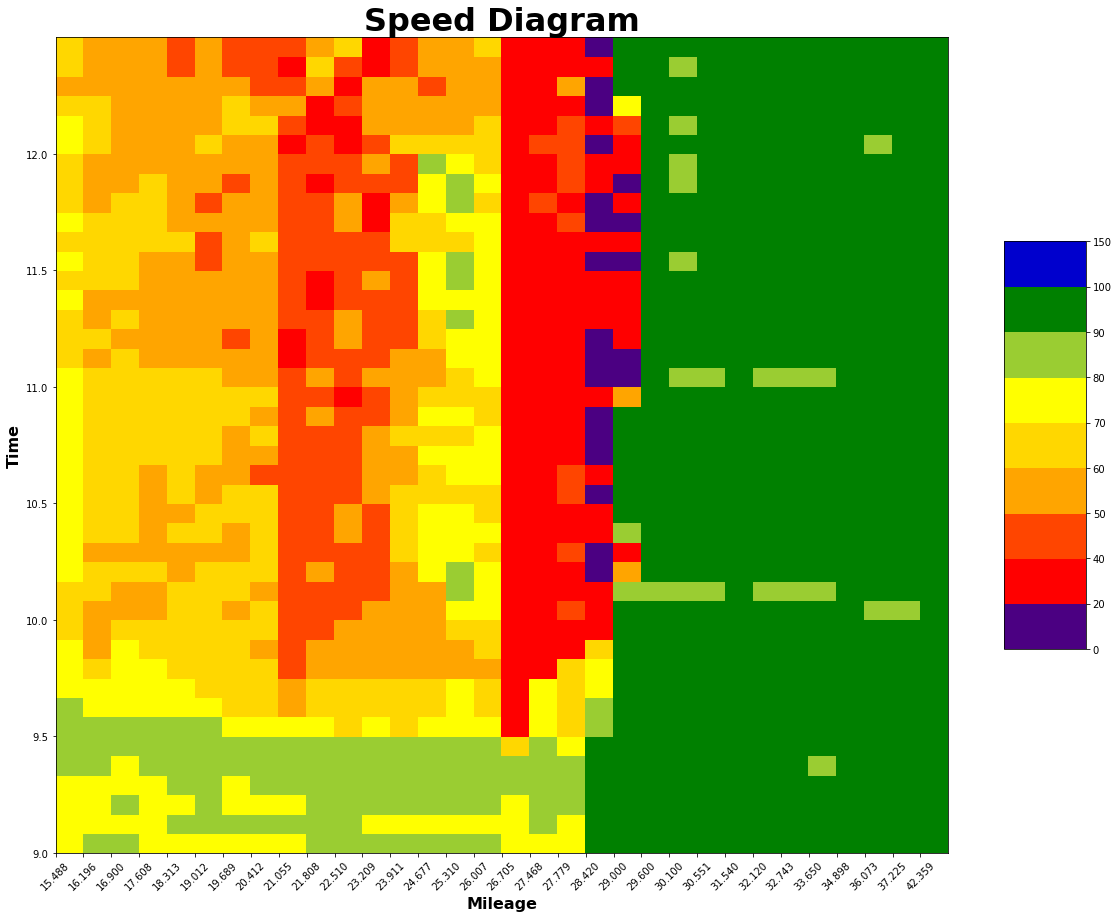

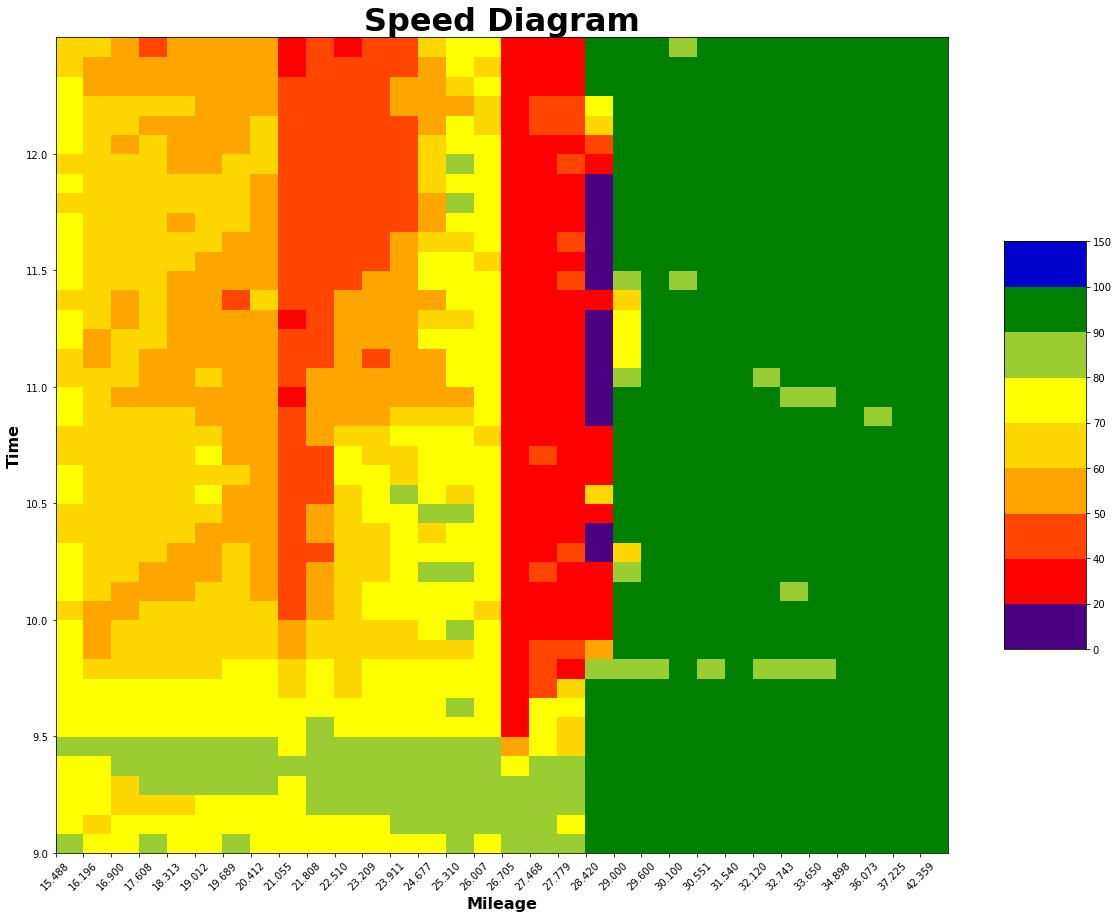

In [242]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,108,150)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [243]:
# simrun 36-40
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,8.10,6.65,8.61,5.58,8.39,4.13,9.26,5.22,8.39,5.80
16.196,6.58,14.31,7.26,20.75,7.31,15.69,7.94,16.01,7.73,16.89
16.900,7.06,7.38,7.74,10.33,7.74,9.38,7.13,9.11,6.70,10.44
17.608,7.32,8.90,7.60,9.99,7.78,10.11,7.78,10.15,7.79,11.86
18.313,7.84,10.09,7.89,10.15,8.34,10.83,8.72,9.95,9.17,11.00
19.012,6.69,7.19,8.67,7.97,8.29,10.19,8.51,9.48,9.21,10.04
19.689,7.12,9.55,8.74,7.68,8.06,8.89,7.70,9.39,8.21,10.75
20.412,6.46,10.19,5.31,10.84,6.23,9.69,5.62,8.26,6.97,11.35
21.055,5.84,18.67,4.49,14.56,5.88,19.61,5.35,16.12,6.26,15.50
21.808,7.20,18.74,7.33,16.22,8.01,16.33,7.42,20.36,8.31,14.16


In [178]:
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.55, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,7.38,6.73,8.35,5.34,7.92,6.31,9.47,6.40,9.59,5.90
16.196,6.58,12.64,7.26,13.26,6.85,11.24,8.36,11.28,7.58,9.77
16.900,6.48,13.76,6.72,10.38,7.37,10.35,7.08,9.45,6.66,8.31
17.608,6.69,13.21,7.75,6.72,7.76,8.45,7.09,7.73,7.25,10.71
18.313,7.24,13.32,8.68,9.00,8.11,9.13,8.42,9.73,8.50,10.87
19.012,7.25,12.47,8.92,8.66,7.34,9.35,8.11,9.43,8.15,10.44
19.689,6.88,10.96,8.71,9.82,7.26,10.30,7.62,8.15,7.22,8.67
20.412,5.52,12.27,5.43,11.90,6.18,12.35,6.10,10.81,6.26,9.73
21.055,5.63,17.34,5.42,14.17,5.60,12.95,5.38,16.88,5.99,17.34
21.808,7.45,15.61,8.11,14.27,8.19,10.19,8.09,14.51,8.07,18.12


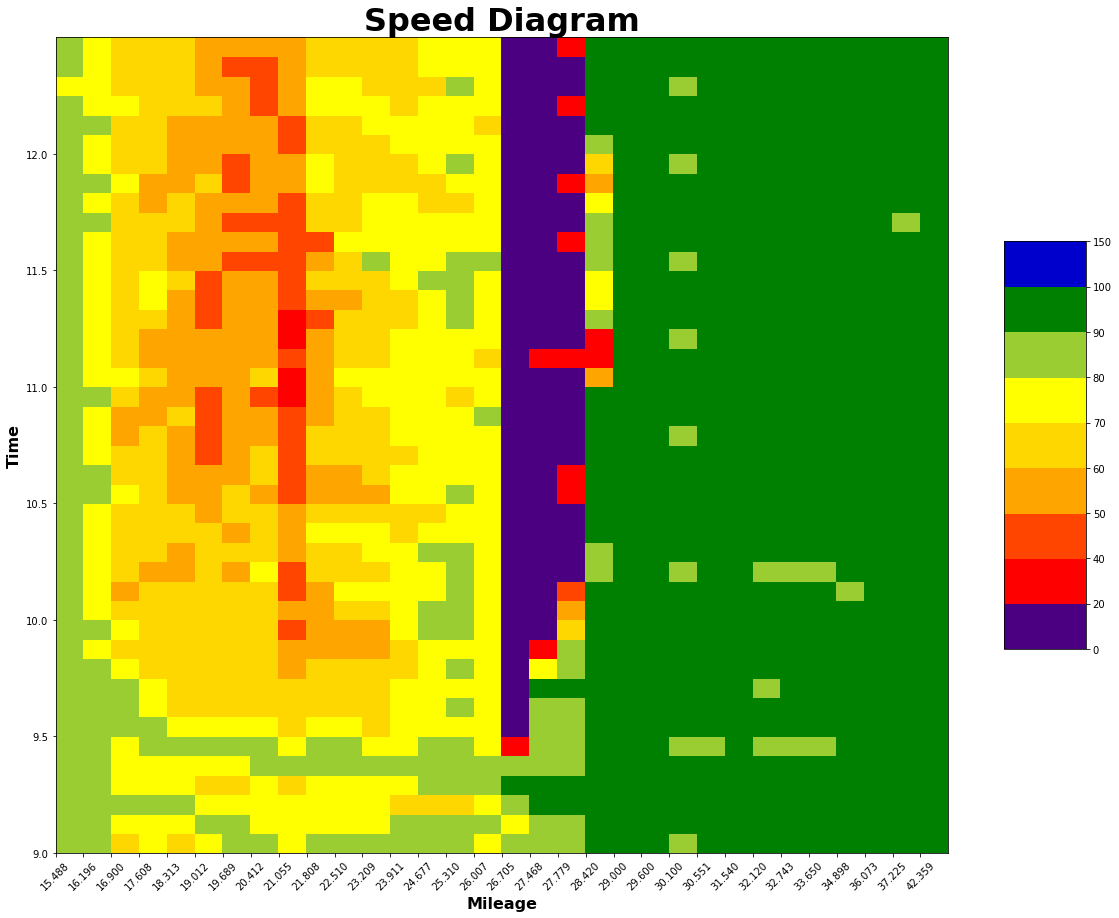

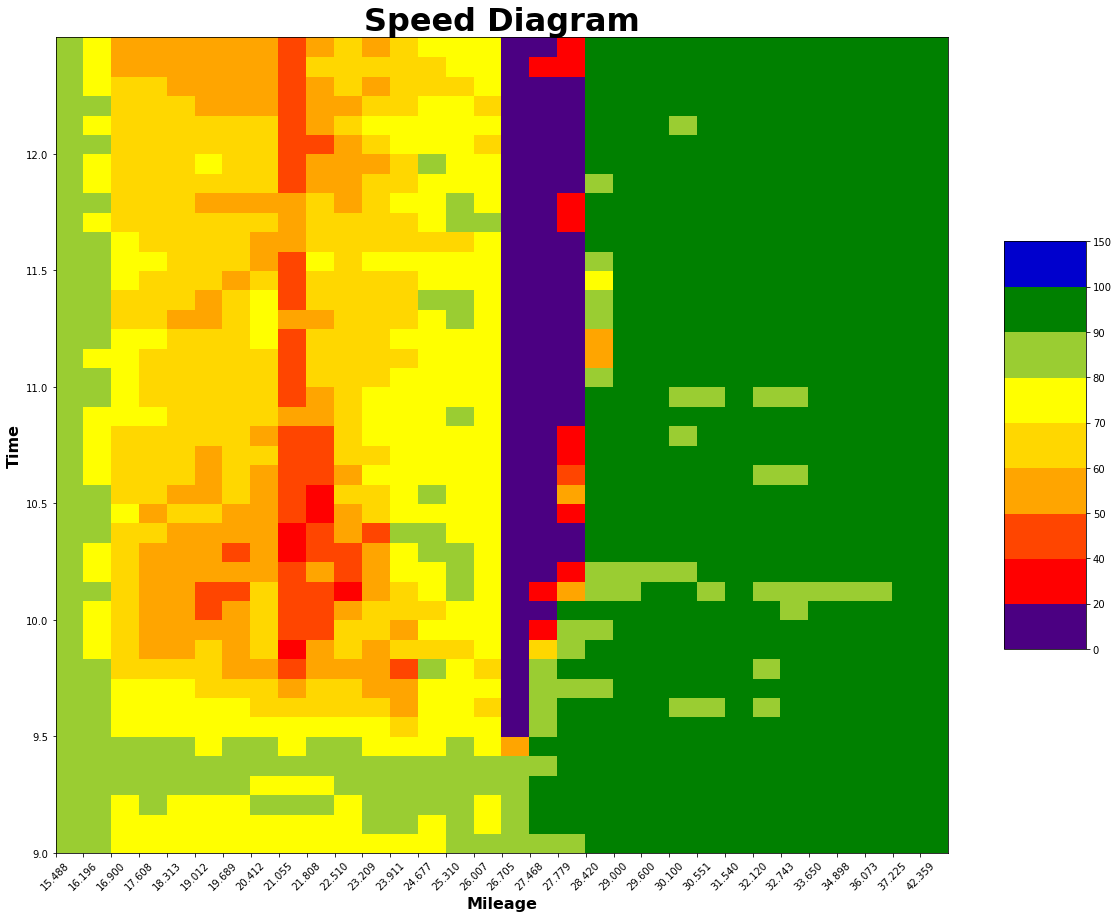

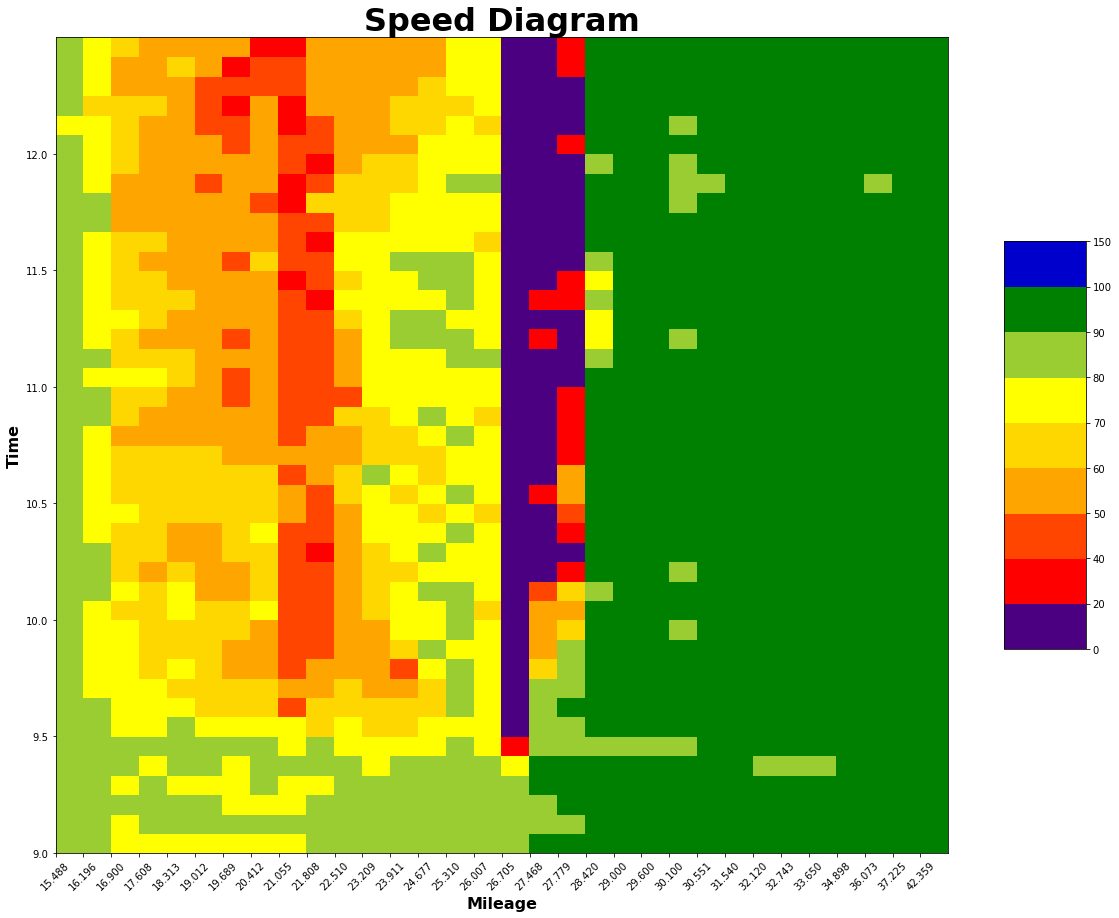

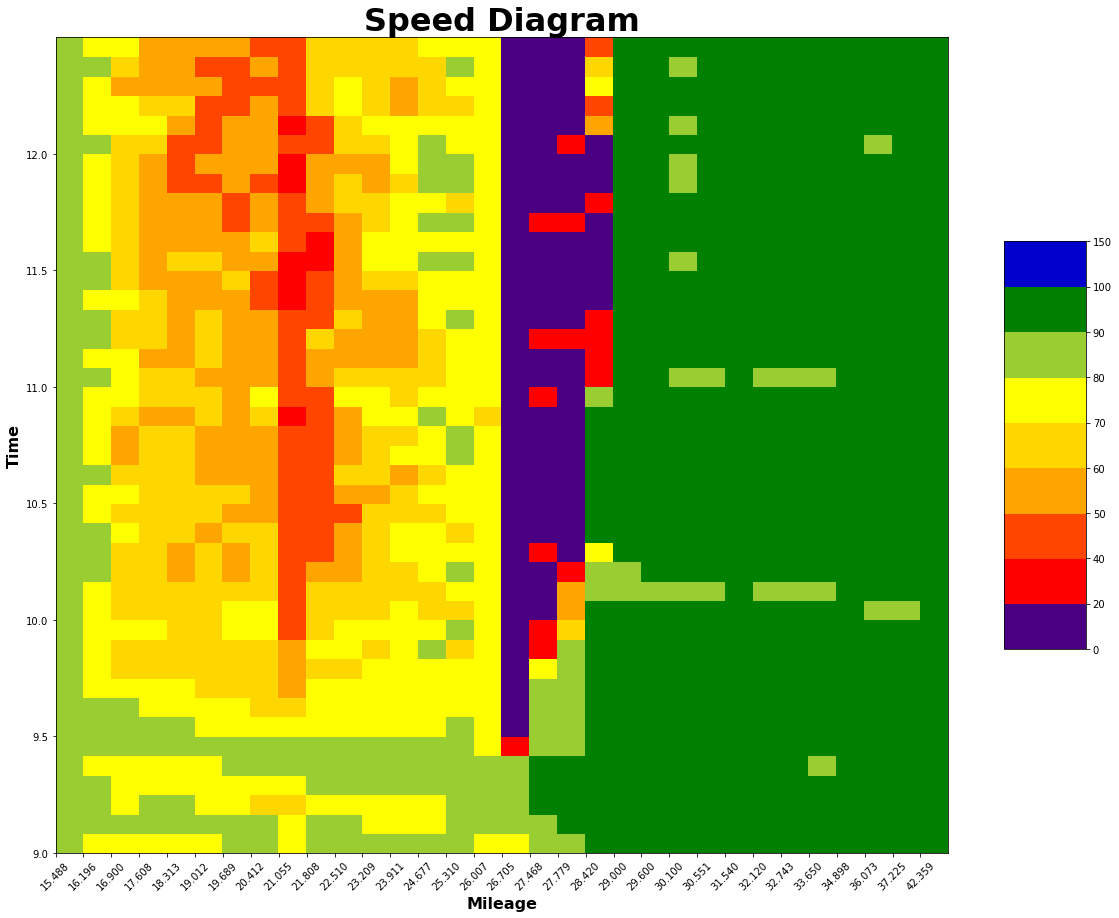

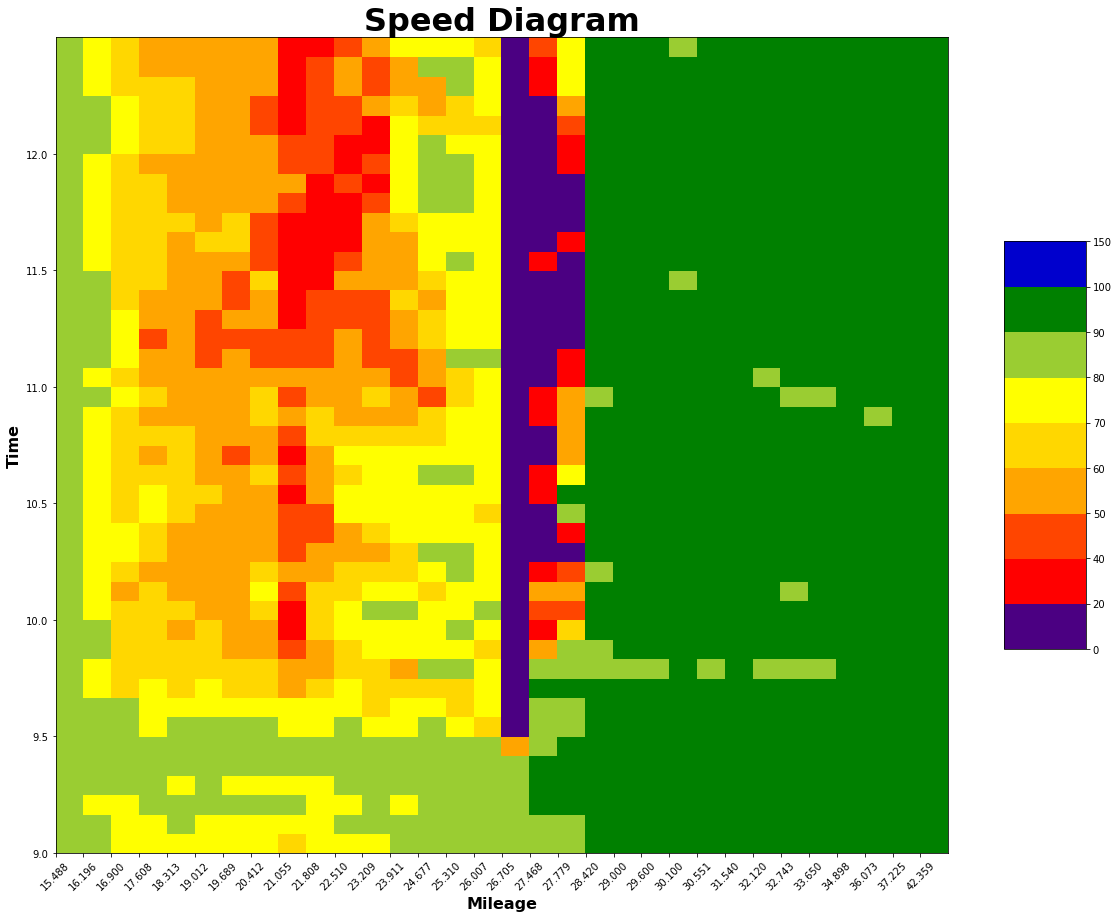

In [95]:
#best solution of GA experiment 5
ind = [1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 3.7, 0.77, 2.69, 2.2, 4.37, 0.64]
exp = pd.DataFrame()
for idx in range(6,11):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for j in range(1,len(Vissim.Net.DataCollectionMeasurements.GetAll())+1):
        temp1 = []
        temp2 = []
        for i in range(1,43):
            i = str(i)
            a = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("Vehs(%s,%s,All)"%(str(idx),i))
            b = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("SpeedAvgArith(%s,%s,All)"%(str(idx),i))
            if b != None:
                b = round(b,2)
            temp1.append(a)
            temp2.append(b)
        df1[j] = temp1
        df2[j] = temp2
    df1.columns = F.columns
    df2.columns = S.columns
    plot_heat(df2,108,150)
    F_mean = round(mape(F,df1),4)*100
    S_mean = round(mape(S,df2),4)*100
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [96]:
#best solution of GA experiment 5
exp

,0,1,0,1,0,1,0,1,0,1
15.488,8.33,17.70,9.35,18.05,8.53,18.00,8.58,18.07,9.92,18.14
16.196,6.56,42.04,7.67,43.15,7.69,40.97,7.19,42.53,8.26,42.78
16.900,6.98,16.20,7.77,16.61,8.83,13.34,7.50,17.59,7.21,16.48
17.608,6.60,14.86,7.87,14.93,9.92,10.99,8.00,12.03,7.78,13.84
18.313,7.44,10.20,9.08,12.42,8.51,11.10,9.11,10.48,9.09,10.50
19.012,6.22,9.75,9.52,10.31,8.26,7.90,8.25,8.56,9.35,9.27
19.689,6.53,7.50,8.90,11.06,9.07,8.02,7.38,8.94,8.53,8.51
20.412,5.95,9.45,5.41,13.96,6.12,8.00,5.15,11.51,6.58,10.31
21.055,6.32,13.53,5.25,12.80,6.20,16.26,5.42,15.83,5.89,17.54
21.808,8.14,19.37,7.72,19.93,8.33,20.18,8.52,19.61,8.47,15.28


# 2020/11/29

In [224]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129\20201129fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129\20201129scal.csv")

In [225]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,636.0,96,4,162.0,81,19,480.0,98,2
1,804.0,90,10,228.0,82,18,624.0,96,4
2,780.0,92,8,276.0,93,7,720.0,100,0
3,960.0,82,18,240.0,95,5,744.0,90,10
4,864.0,89,11,252.0,100,0,864.0,97,3
5,828.0,90,10,336.0,96,4,576.0,98,2
6,1356.0,96,4,264.0,100,0,408.0,97,3
7,972.0,88,12,216.0,100,0,708.0,97,3
8,1044.0,89,11,240.0,90,10,828.0,97,3
9,1104.0,88,10,234.0,95,5,936.0,96,4


In [226]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.88,0.78,0.0,0.75,0.00,0.0
1,0.75,0.00,0.0,0.82,1.00,0.0
2,0.94,1.00,0.0,0.88,1.00,0.0
3,0.84,1.00,0.0,0.80,0.86,0.0
4,0.85,0.00,0.0,0.77,1.00,0.0
5,0.88,0.82,0.0,0.77,0.71,0.0
6,0.91,1.00,0.0,0.81,1.00,0.0
7,0.86,0.57,0.0,0.79,1.00,0.0
8,0.83,0.86,0.0,0.73,1.00,0.0
9,0.85,0.25,0.0,0.81,0.89,1.0


In [227]:
set_vehinput(vehinp)
set_vehroute(routeratio)

88 10 2
89 9 2
90 8 2
89 9 2


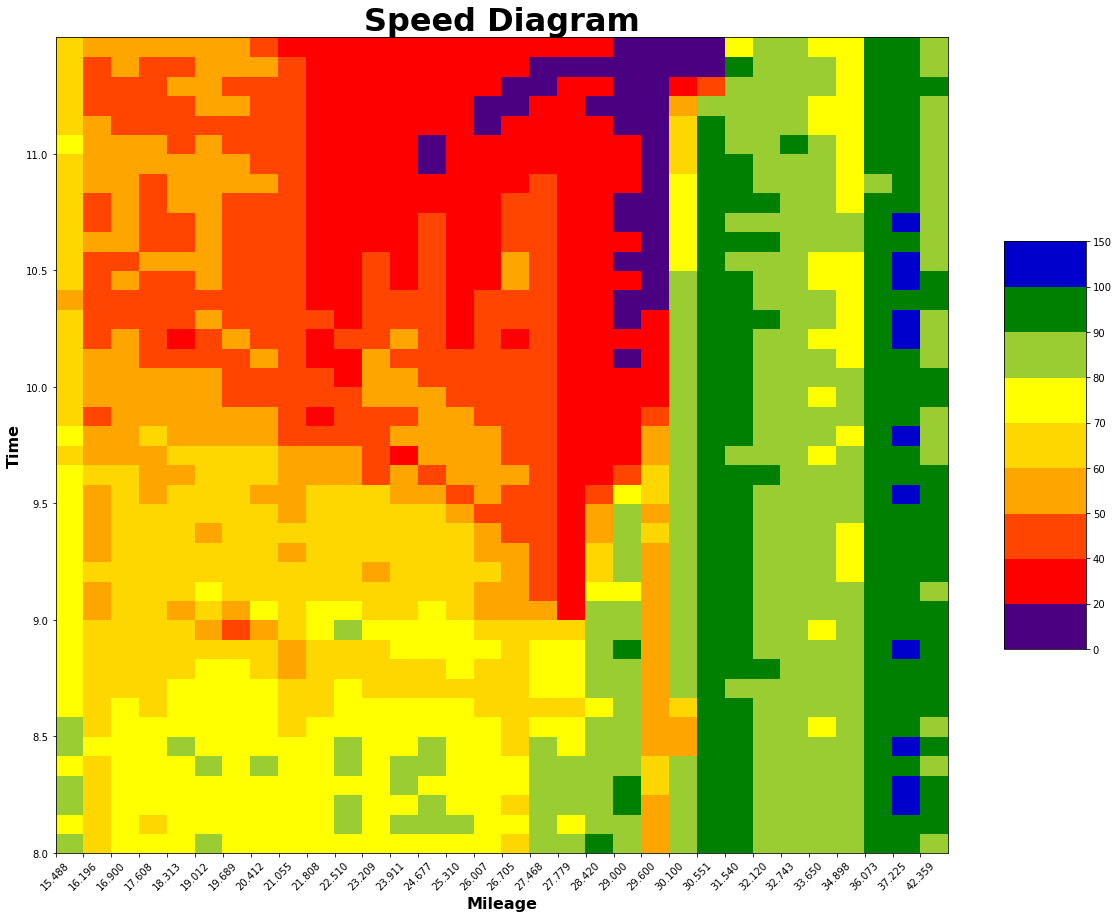

In [232]:
plot_heat(S,96,136)

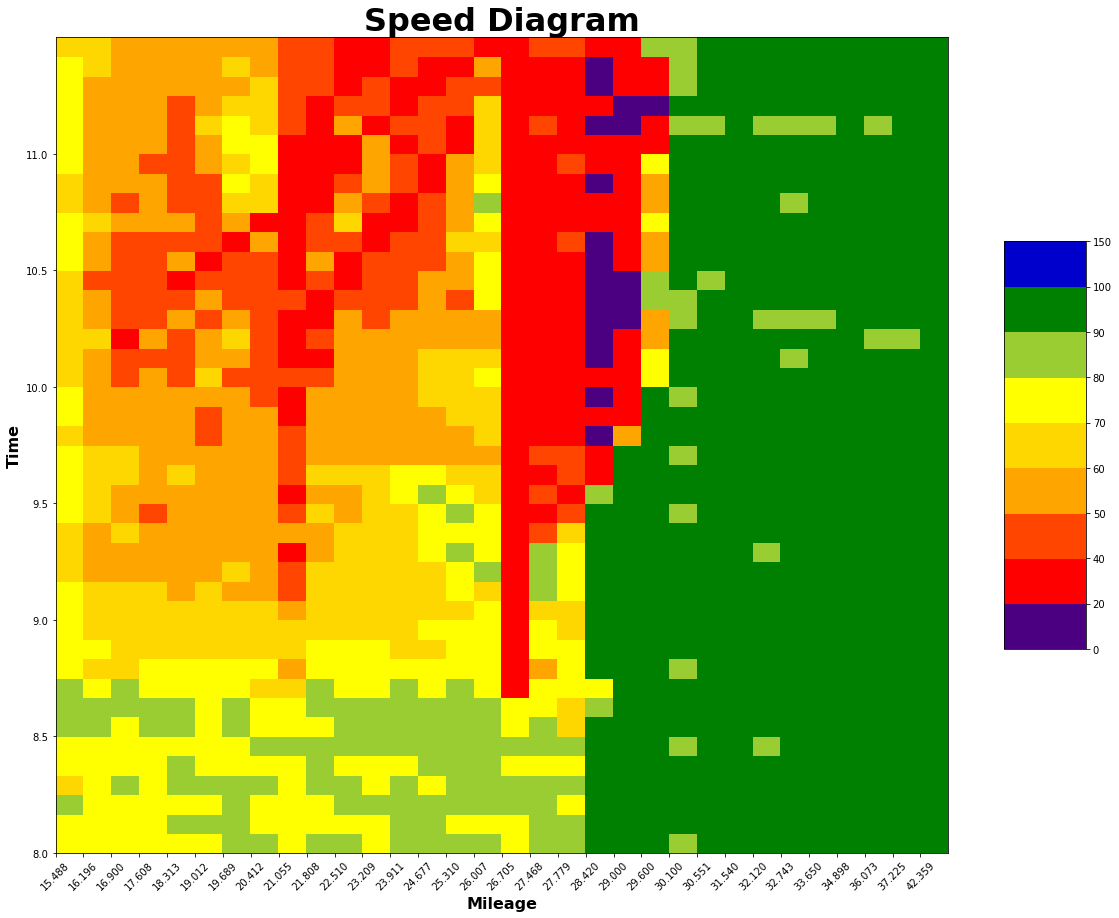

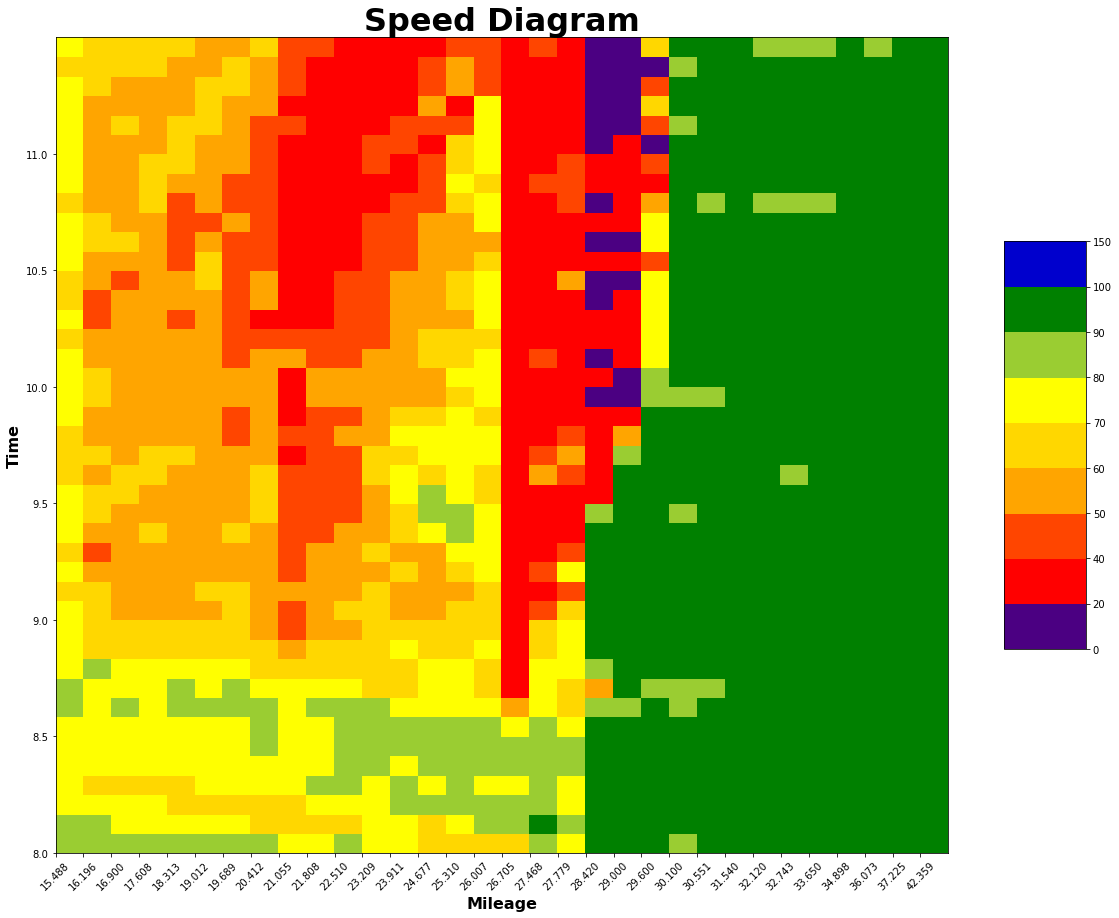

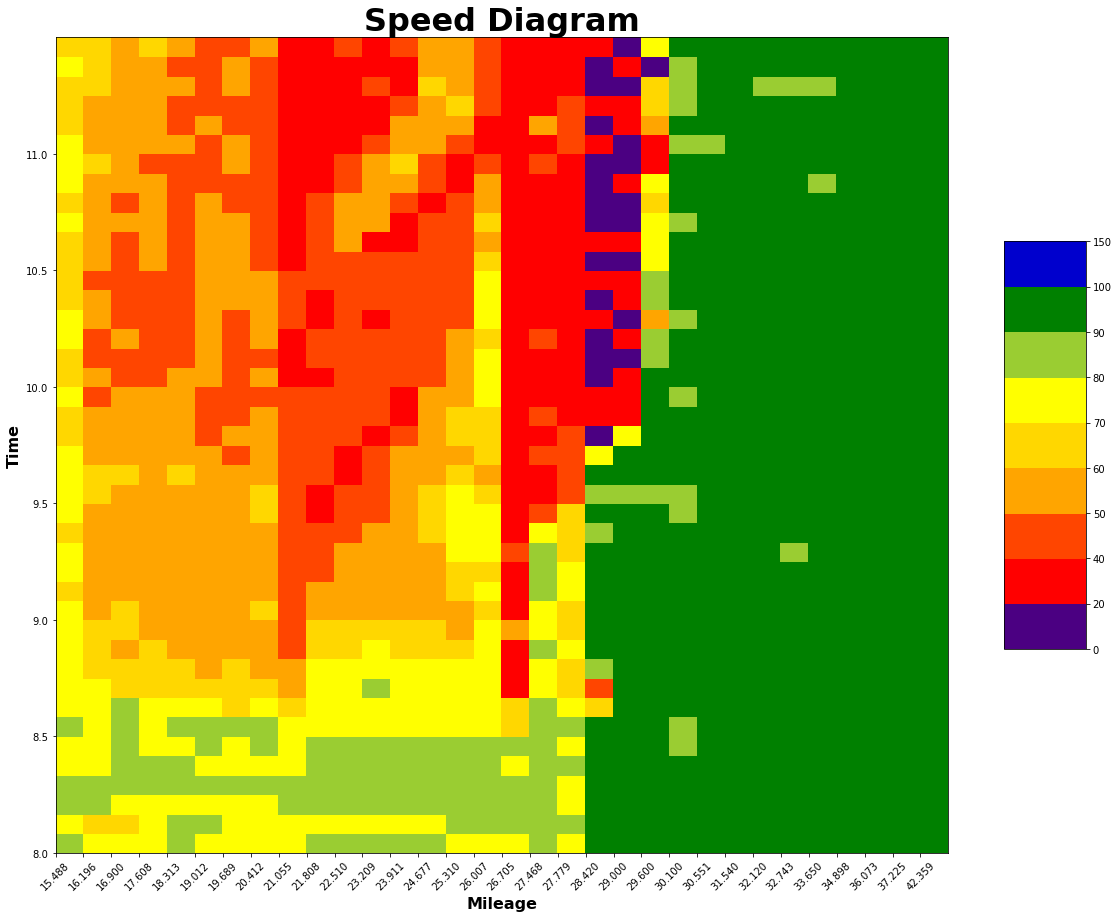

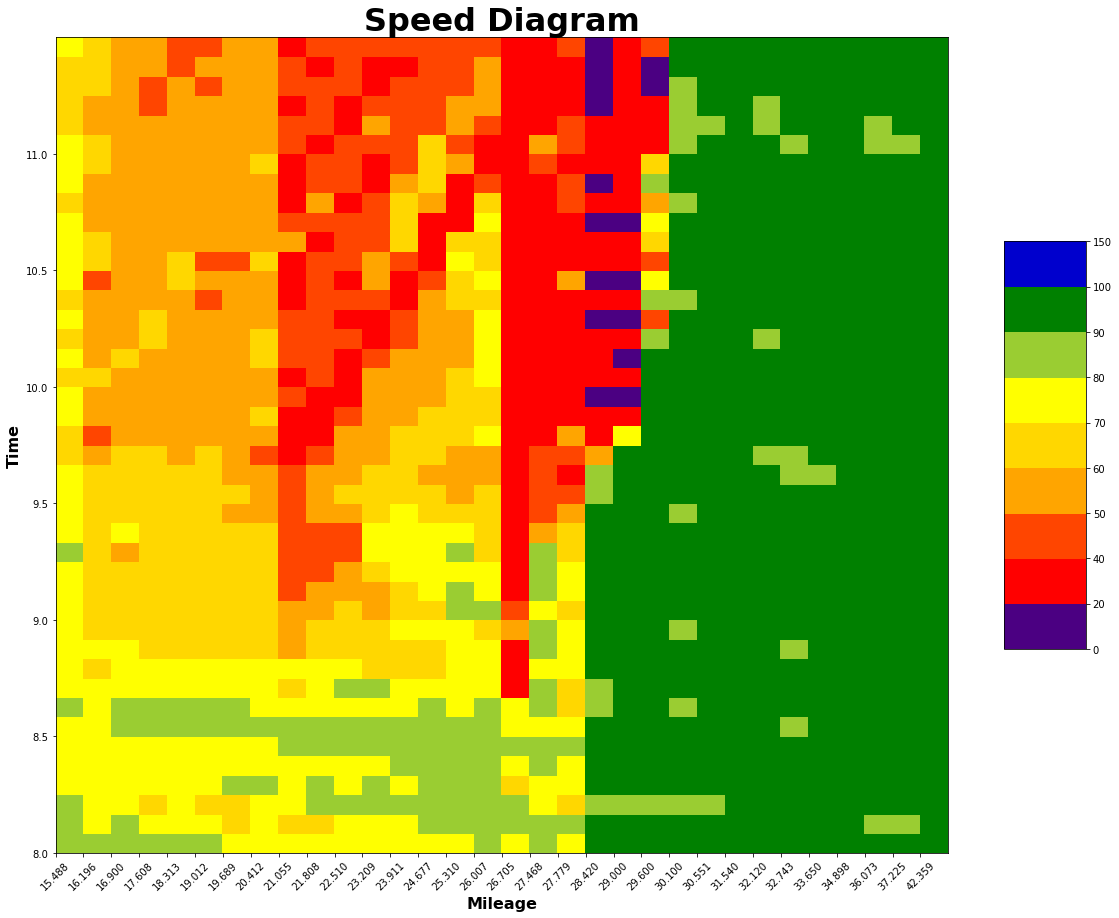

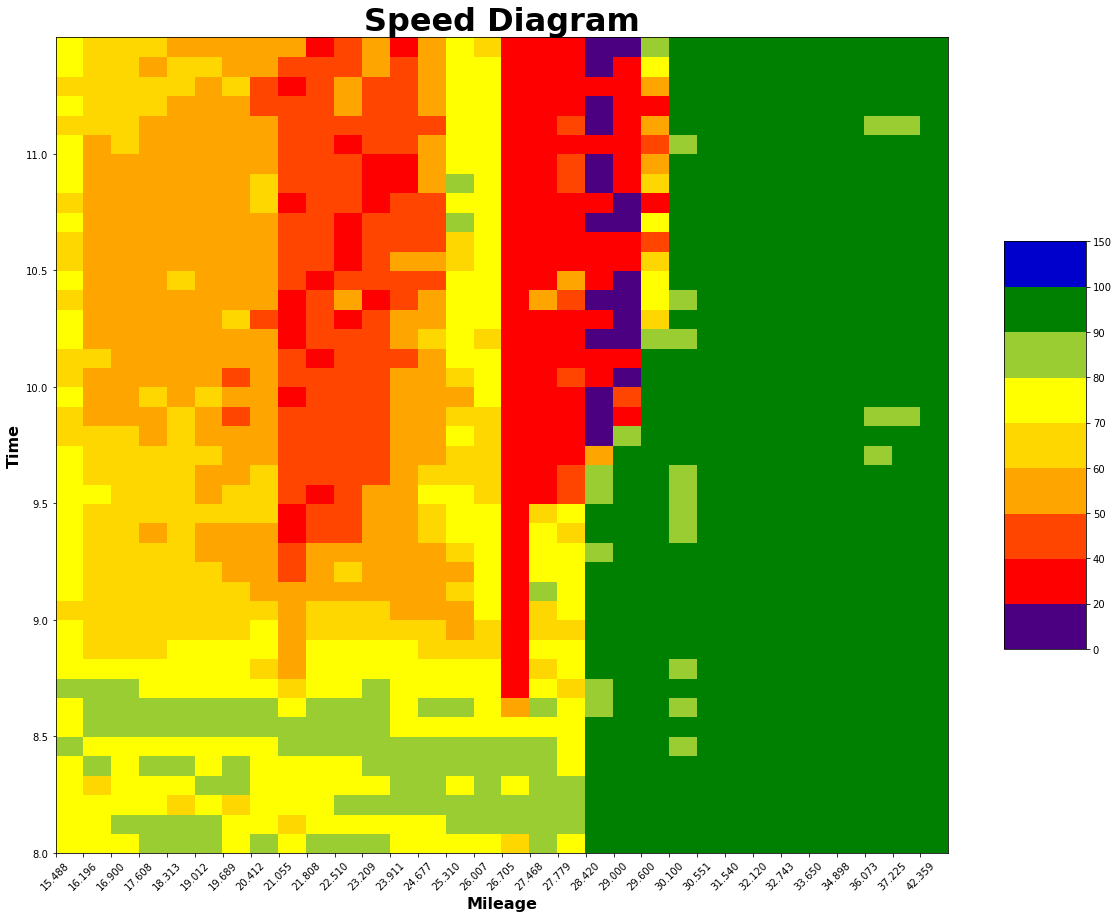

In [229]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,96,138)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [236]:
# simrun 31-35
# time between 8:00-11:50 because of mainline metering control
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,8.94,7.52,10.68,8.23,8.74,6.35,10.49,7.67,10.06,6.25
16.196,10.11,11.60,9.58,13.34,8.30,10.72,8.60,13.25,8.75,16.12
16.900,7.13,6.69,7.51,9.30,6.67,7.49,6.33,8.08,5.98,9.68
17.608,7.99,8.76,8.81,11.00,8.11,7.84,6.74,9.89,7.26,10.82
18.313,7.54,7.31,8.05,10.20,6.90,8.91,7.07,10.00,6.95,11.73
19.012,9.48,10.22,9.11,9.12,8.29,9.46,9.03,4.84,8.50,7.61
19.689,9.34,14.35,9.36,10.08,7.69,9.55,8.99,8.99,9.61,12.23
20.412,8.85,13.82,8.01,8.50,6.48,7.76,7.39,12.26,7.31,11.90
21.055,8.45,13.02,7.69,15.03,6.17,13.25,7.58,12.75,7.07,11.67
21.808,7.12,14.30,6.53,16.11,6.11,16.72,7.57,17.42,6.29,19.46


In [231]:
# simrun 31-35
# time between 8:00-12:00
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,8.89,8.14,10.61,8.59,8.75,6.75,10.58,8.05,10.10,7.17
16.196,9.88,12.36,9.50,14.08,8.35,11.65,8.46,13.76,8.83,17.06
16.900,6.97,6.80,7.49,9.85,6.62,7.51,6.23,8.16,5.98,10.51
17.608,7.68,8.91,8.67,11.61,7.90,8.26,6.59,9.79,7.07,11.54
18.313,7.67,7.37,8.33,10.34,7.15,8.64,7.34,9.88,7.23,11.92
19.012,9.49,9.99,9.18,8.94,8.44,9.78,9.06,5.08,8.70,7.80
19.689,9.52,14.26,9.55,10.42,7.91,9.39,9.21,8.67,9.86,12.09
20.412,9.21,14.01,8.41,9.29,6.92,7.80,7.85,12.34,7.76,12.29
21.055,8.58,12.53,7.89,14.89,6.43,13.07,7.75,12.21,7.28,12.07
21.808,7.42,16.20,6.76,17.20,6.34,17.36,7.74,18.64,6.54,20.39


In [198]:
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.55, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,19.78,9.05,19.68,9.15,19.81,8.04,21.56,6.68,20.18,8.13
16.196,20.31,11.41,20.12,14.23,20.60,12.77,22.99,8.91,20.91,12.29
16.900,19.18,12.85,19.06,12.61,19.63,17.23,21.50,11.34,20.16,13.17
17.608,17.17,13.32,17.15,10.45,18.05,14.15,19.64,9.88,18.34,17.79
18.313,19.08,15.36,18.69,13.61,19.11,17.93,20.58,12.90,19.82,14.28
19.012,21.99,15.88,21.60,15.76,21.81,18.54,22.62,11.82,21.80,15.27
19.689,20.38,15.67,20.15,17.96,20.68,13.86,21.86,13.33,20.83,14.71
20.412,20.78,16.02,20.73,18.28,19.90,17.74,20.90,12.55,20.88,16.87
21.055,19.46,25.29,19.94,23.58,20.33,25.46,20.27,20.55,19.69,20.93
21.808,17.87,25.40,17.67,25.95,17.98,34.22,18.35,15.71,17.99,28.03


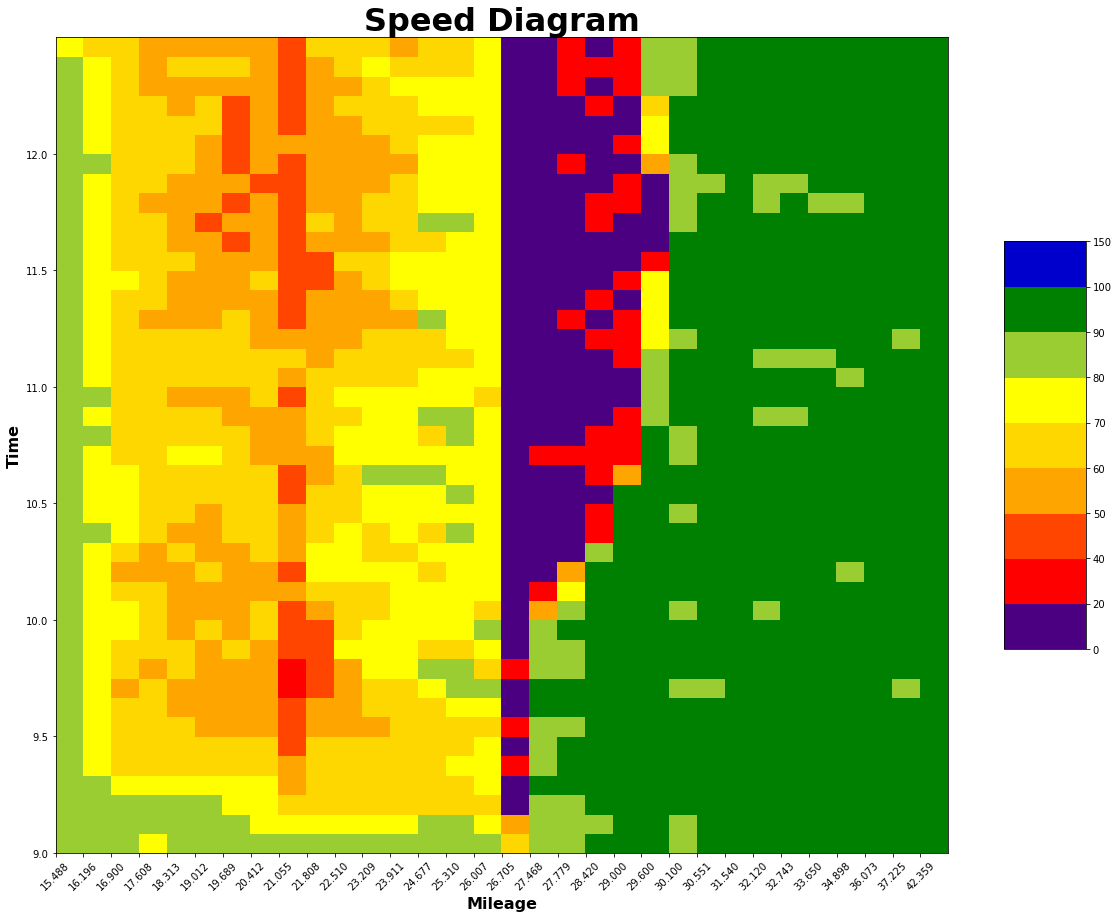

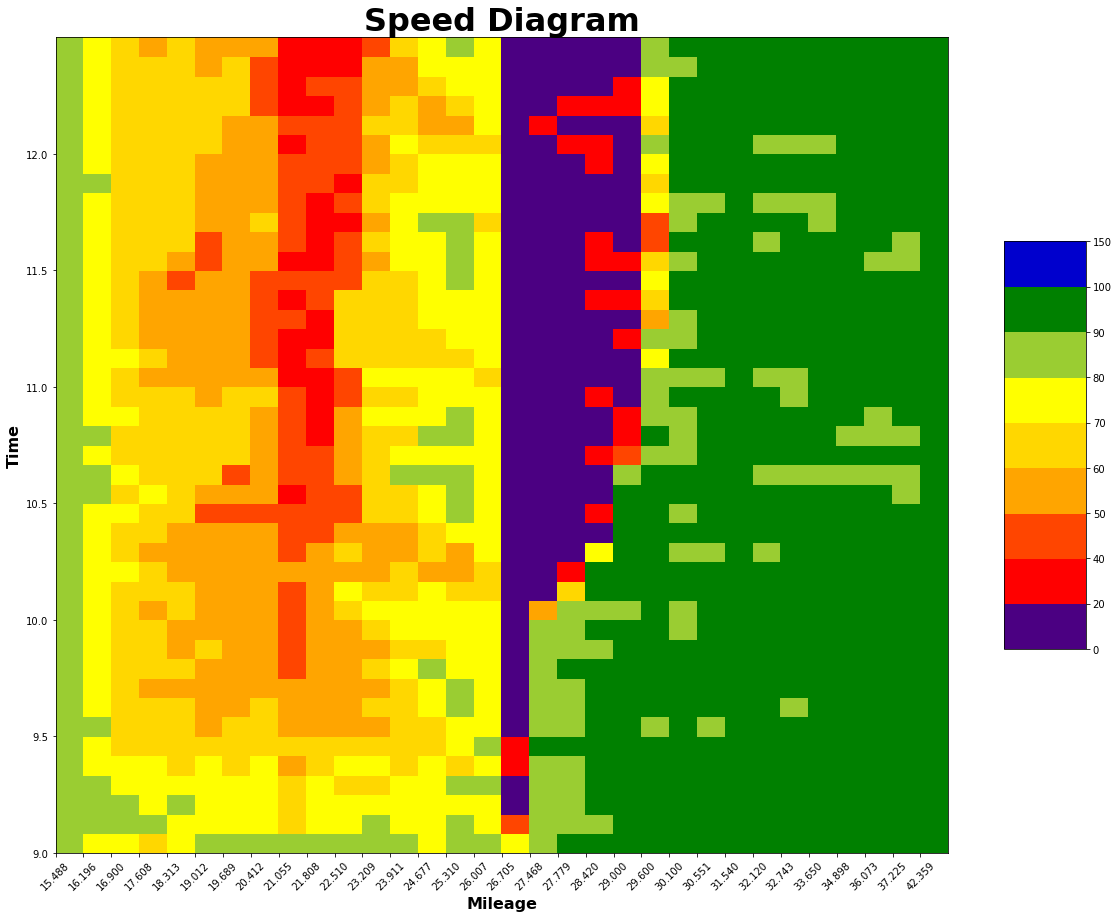

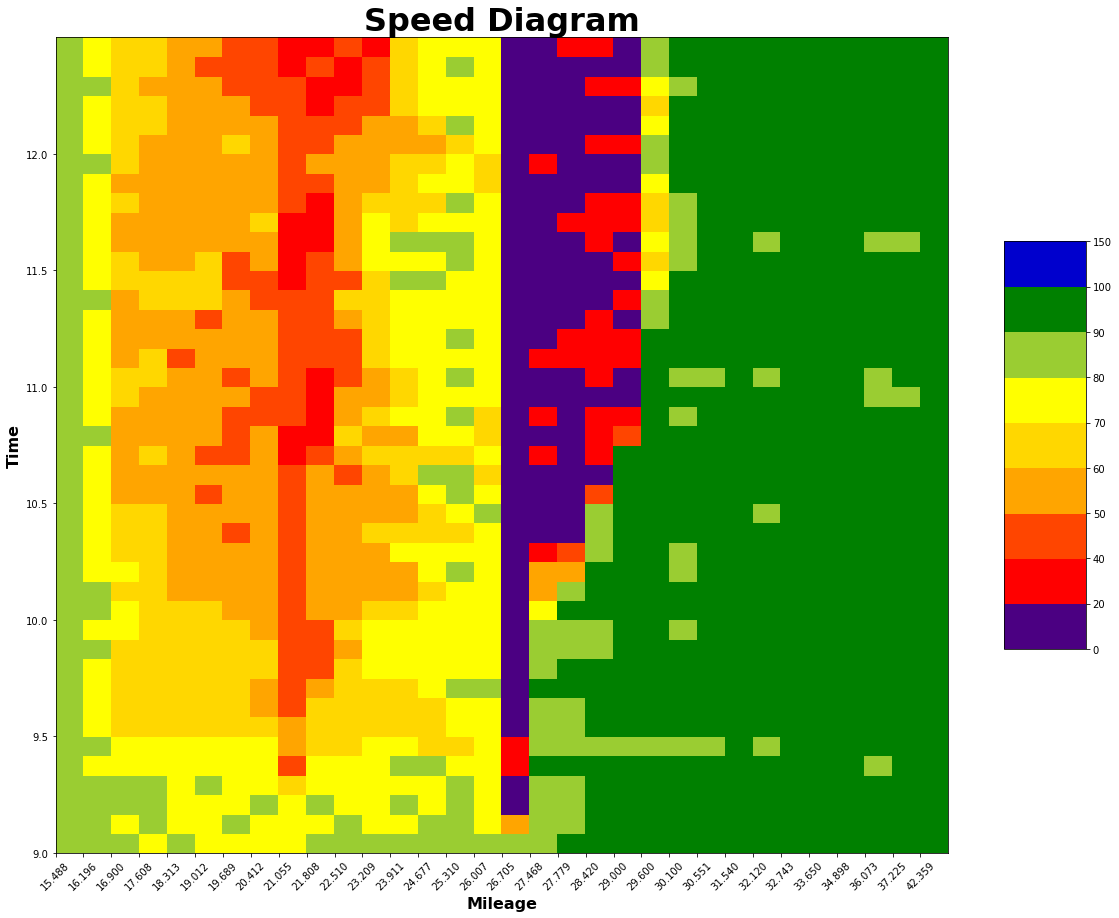

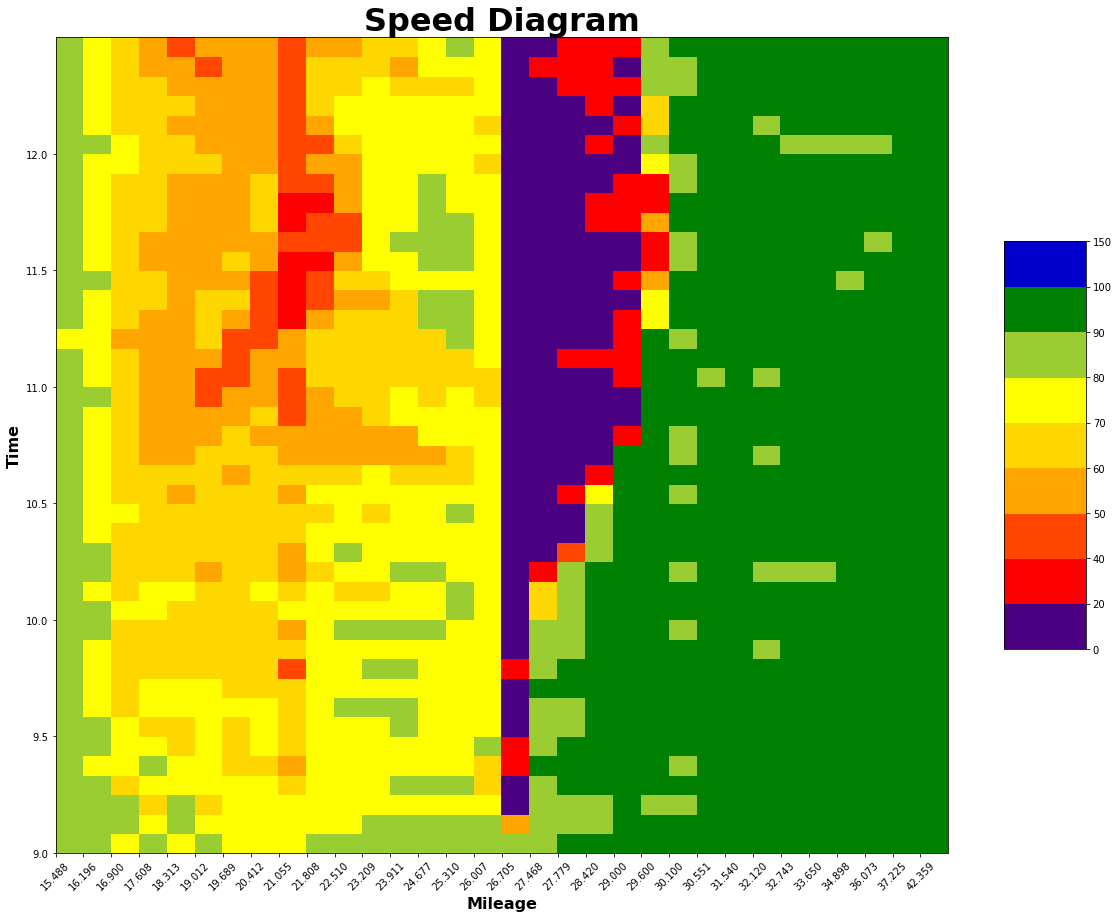

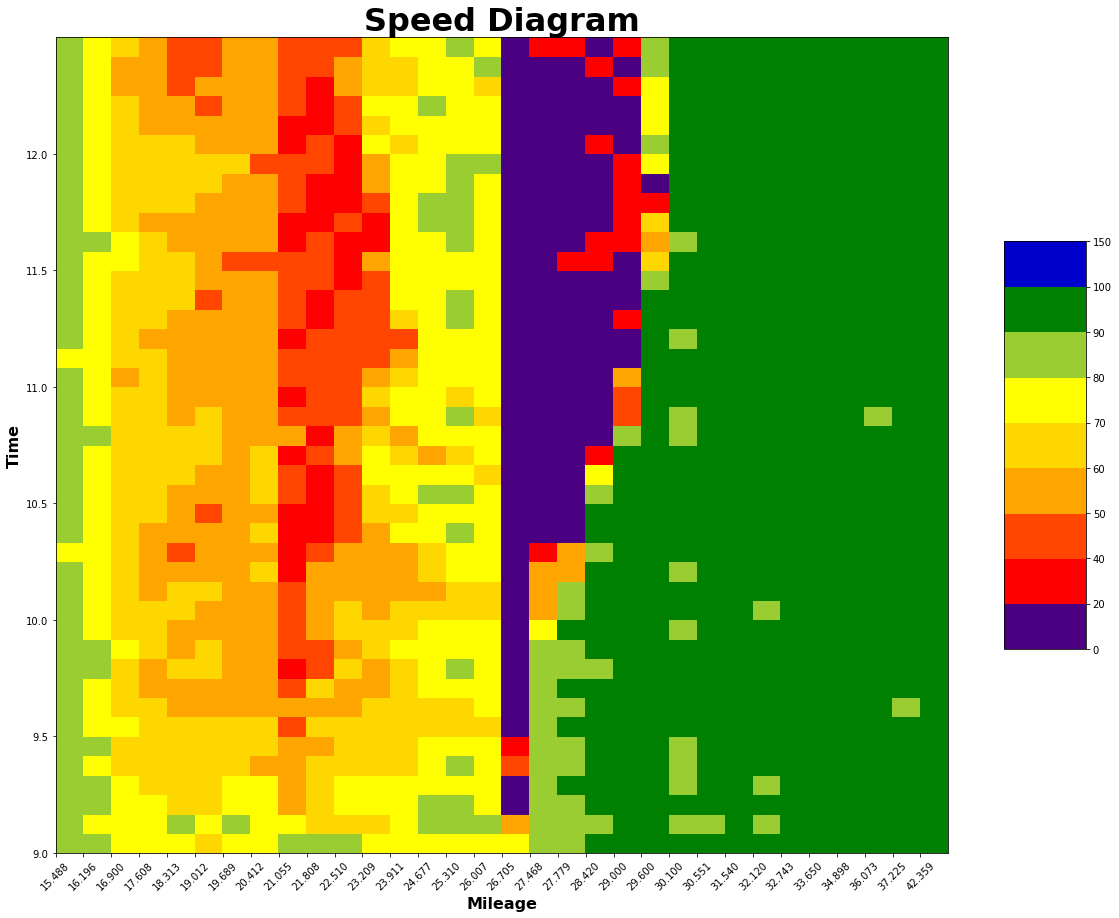

In [135]:
#best solution of GA experiment 5
ind = [1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 3.7, 0.77, 2.69, 2.2, 4.37, 0.64]
exp = pd.DataFrame()
for idx in range(16,21):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for j in range(1,len(Vissim.Net.DataCollectionMeasurements.GetAll())+1):
        temp1 = []
        temp2 = []
        for i in range(1,43):
            i = str(i)
            a = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("Vehs(%s,%s,All)"%(str(idx),i))
            b = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("SpeedAvgArith(%s,%s,All)"%(str(idx),i))
            if b != None:
                b = round(b,2)
            temp1.append(a)
            temp2.append(b)
        df1[j] = temp1
        df2[j] = temp2
    df1.columns = F.columns
    df2.columns = S.columns
    plot_heat(df2,108,150)
    F_mean = round(mape(F,df1),4)*100
    S_mean = round(mape(S,df2),4)*100
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [136]:
#best solution of GA experiment 5
exp

,0,1,0,1,0,1,0,1,0,1
15.488,7.52,24.30,6.75,23.88,8.20,23.70,7.22,23.98,7.35,23.68
16.196,7.28,45.45,8.24,46.54,7.07,44.89,7.52,46.47,8.48,45.30
16.900,6.78,21.56,6.49,20.52,5.88,15.58,6.63,19.81,6.56,18.33
17.608,7.47,20.23,7.07,19.55,6.79,16.32,6.68,19.20,7.18,18.86
18.313,7.51,16.30,7.42,16.75,7.07,10.11,7.71,14.46,7.57,15.14
19.012,8.81,11.60,7.94,11.20,7.45,7.26,7.69,11.31,7.69,10.39
19.689,7.86,15.22,7.37,13.26,7.06,11.94,7.82,13.60,7.59,11.46
20.412,7.99,17.02,7.92,12.10,7.76,11.13,8.15,17.32,7.56,14.85
21.055,7.60,13.90,7.84,9.99,6.90,10.22,7.72,14.90,7.74,11.82
21.808,7.54,51.13,6.72,16.84,6.16,22.58,7.16,46.50,7.09,16.29


# 2021/04/18

In [252]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20210418\20210418fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20210418\20210418scal.csv")

In [253]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20210418\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,780.0,92,8,162.0,85,15,480.0,100,0
1,744.0,87,11,174.0,100,0,588.0,98,2
2,780.0,92,8,168.0,100,0,468.0,90,10
3,924.0,95,5,204.0,97,3,576.0,100,0
4,912.0,89,11,234.0,87,13,492.0,95,5
5,912.0,92,8,240.0,90,10,732.0,90,10
6,996.0,98,2,324.0,94,6,504.0,98,2
7,948.0,92,8,216.0,97,3,672.0,93,7
8,852.0,87,13,120.0,90,10,552.0,89,11
9,1056.0,97,3,198.0,100,0,624.0,96,4


In [254]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20210418\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.89,0.75,0.0,0.77,1.00,0.0
1,0.80,0.60,0.0,0.74,1.00,1.0
2,0.83,0.88,0.0,0.78,1.00,0.0
3,0.87,0.40,0.0,0.81,1.00,0.0
4,0.82,1.00,0.0,0.79,0.75,0.0
5,0.84,0.70,0.0,0.81,0.83,0.0
6,0.84,0.82,0.0,0.79,1.00,0.0
7,0.82,1.00,0.0,0.81,1.00,0.0
8,0.83,1.00,0.0,0.68,1.00,0.0
9,0.88,0.75,0.0,0.72,0.33,0.0


In [272]:
set_vehinput(vehinp)
set_vehroute(routeratio)

87 11 2
94 5 1
88 10 2
90 9 1
96 2 2


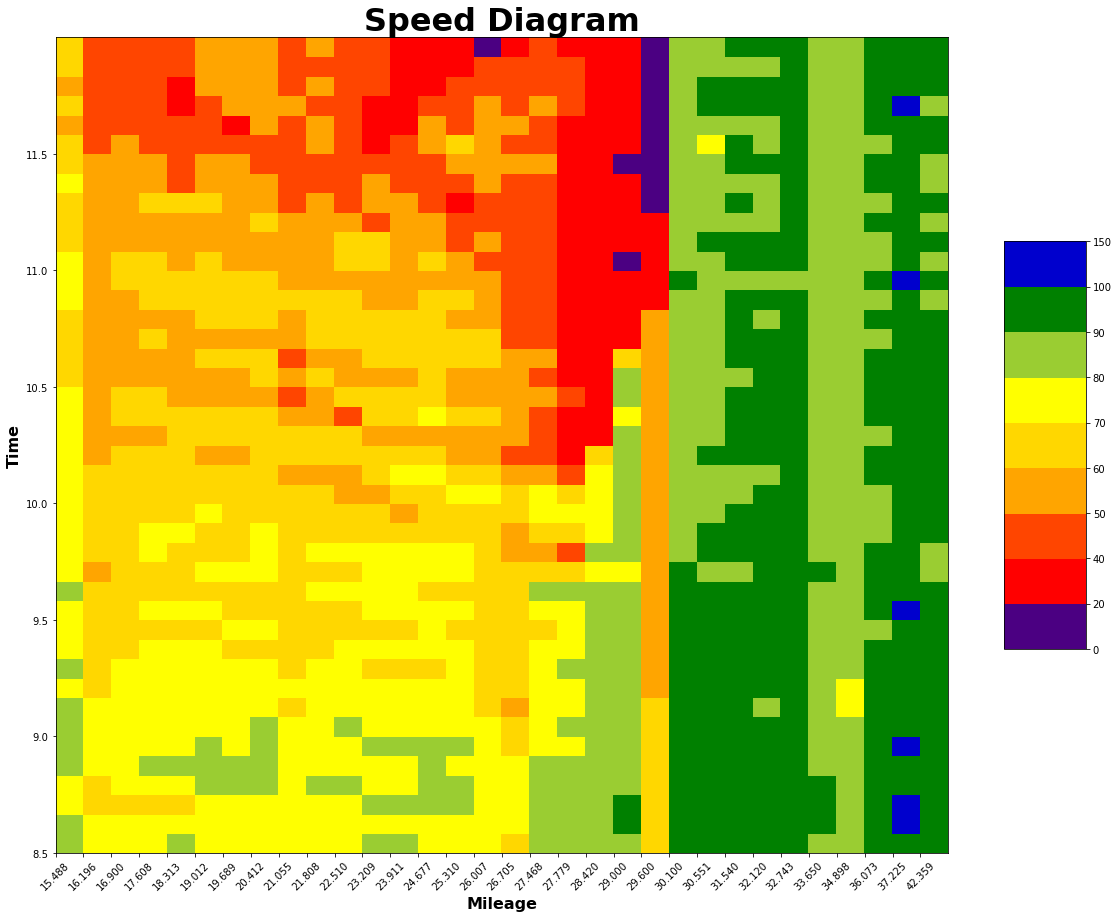

In [273]:
plot_heat(S,102,144)

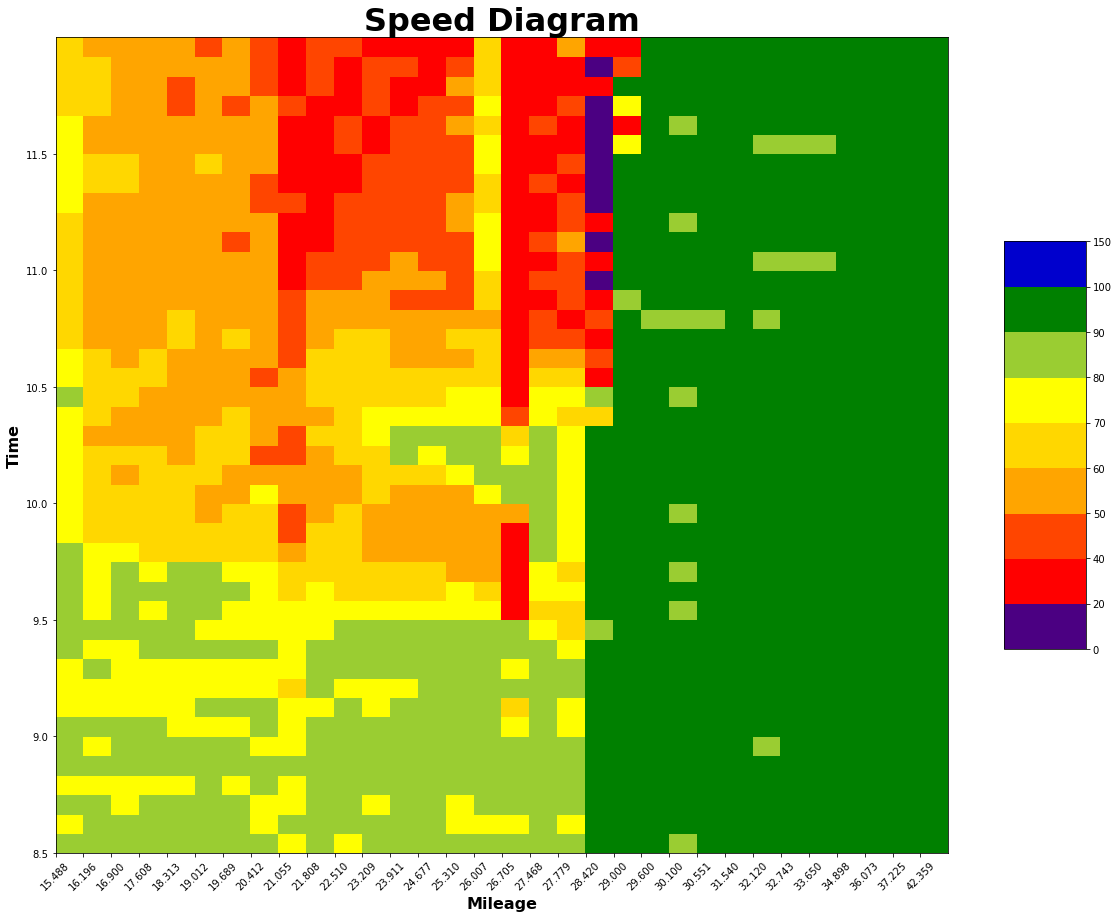

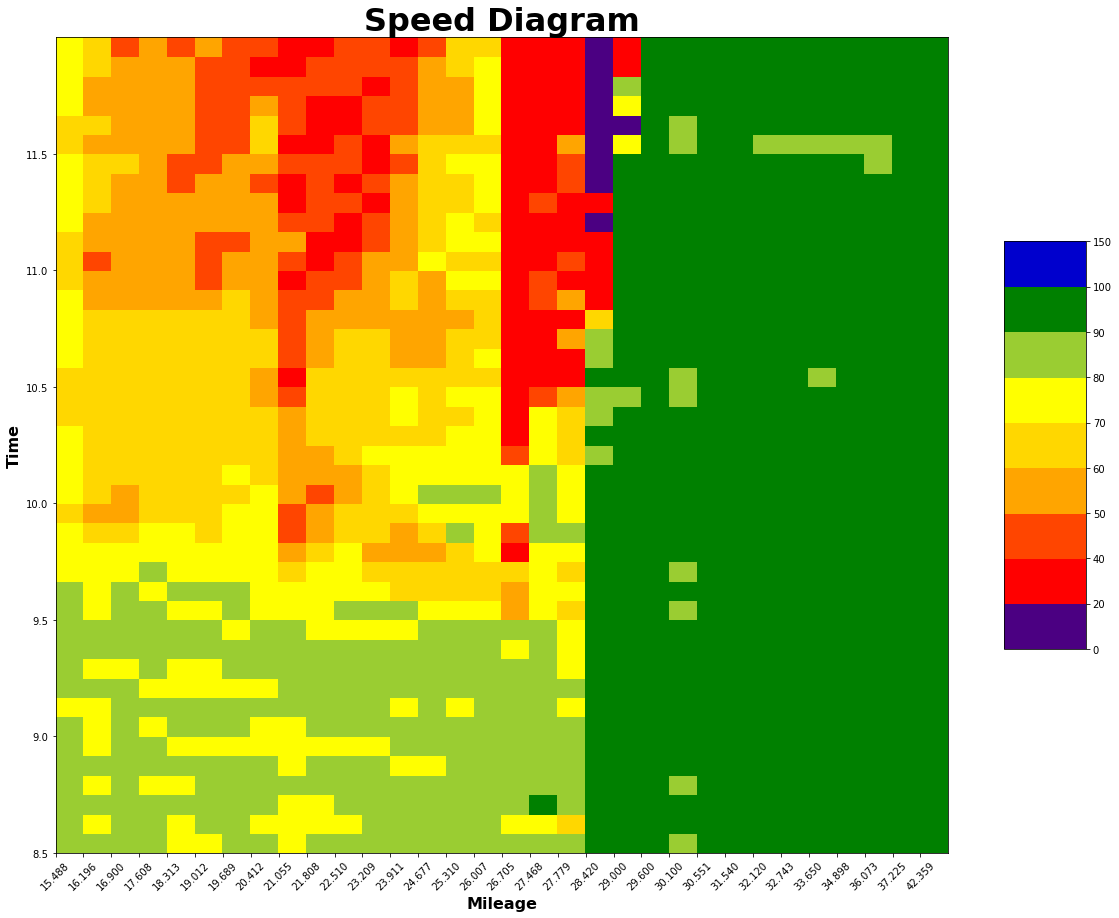

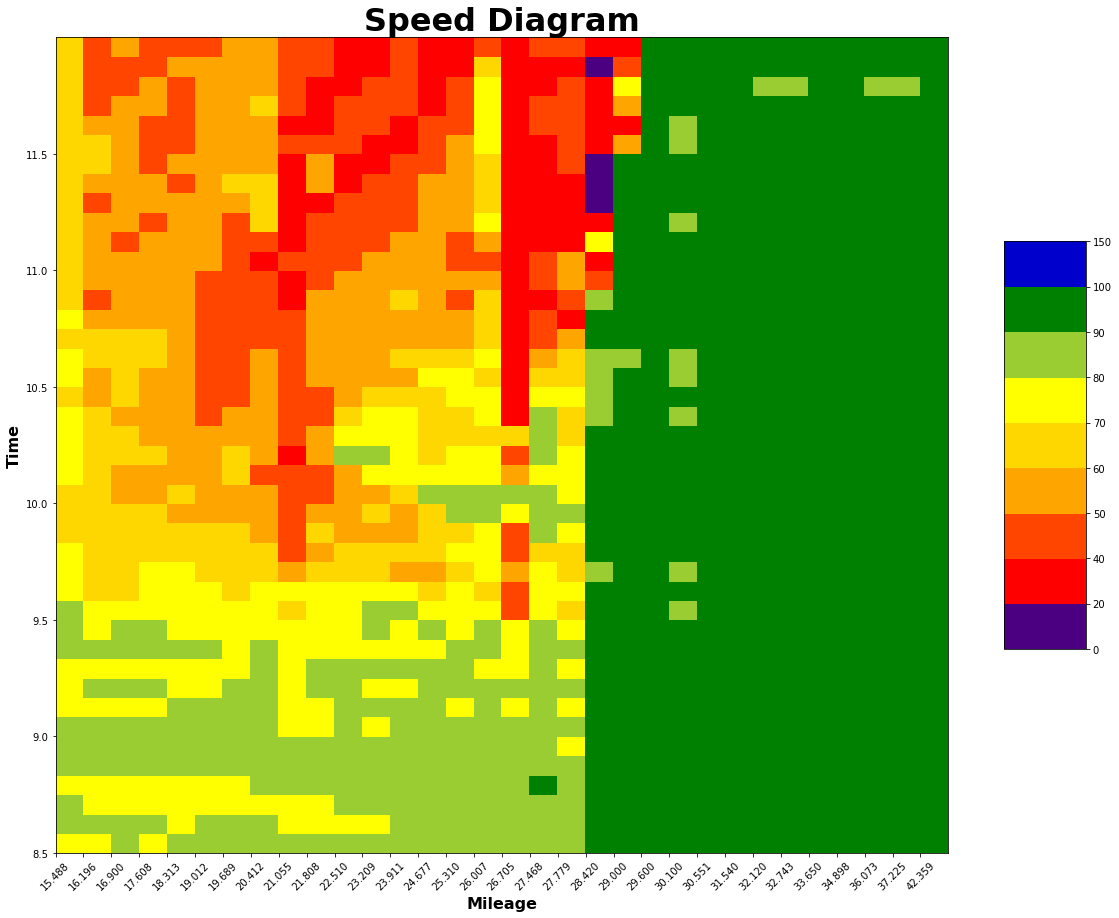

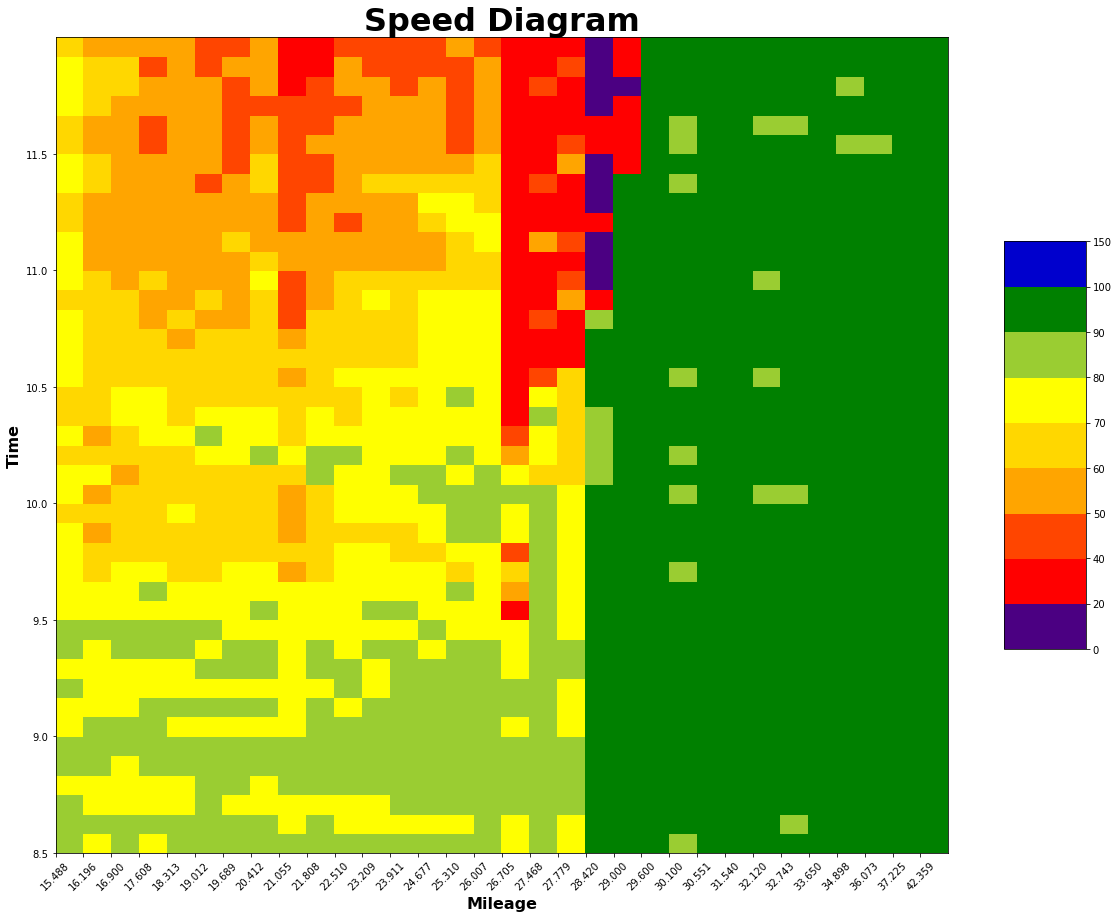

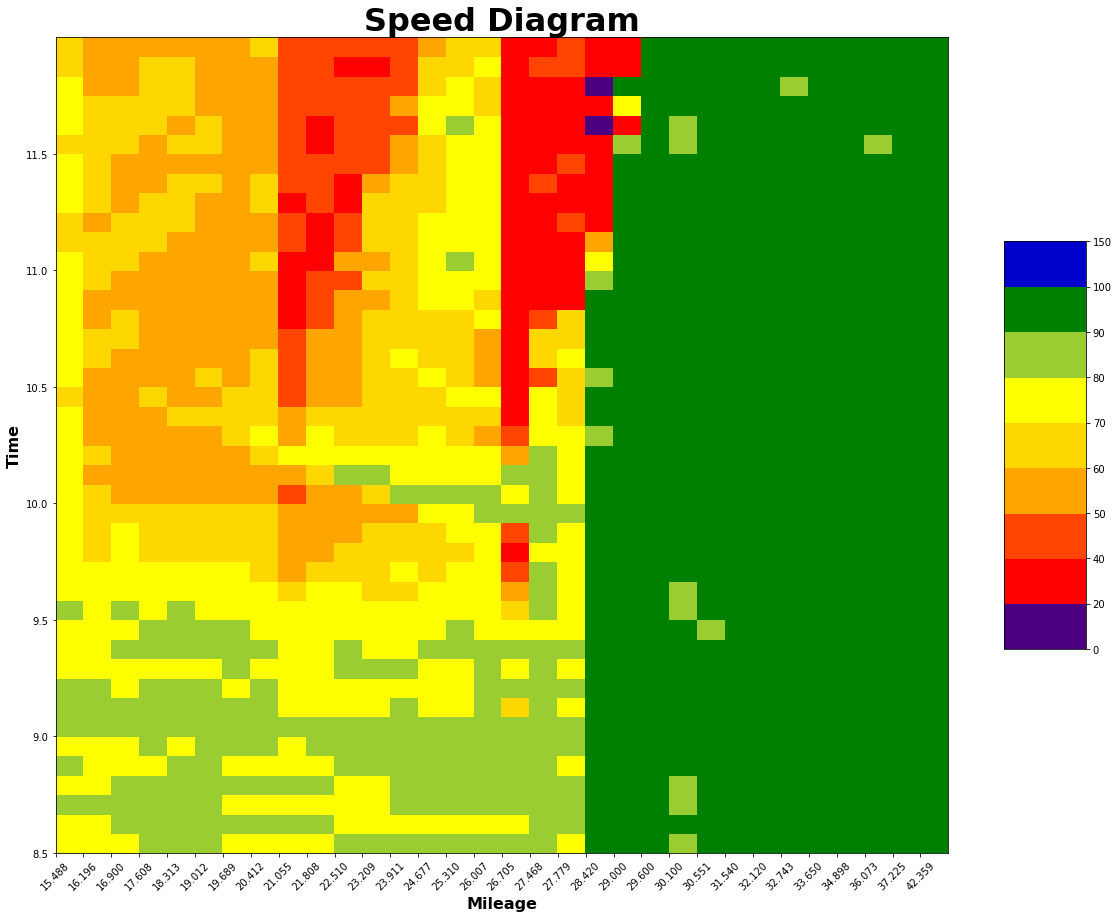

In [278]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,102,144)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [275]:
#simrun 41-45 
#ind = [1.5, 2.2, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,9.55,6.57,9.19,6.58,8.87,5.07,8.37,7.14,6.53,4.98
16.196,7.70,15.39,7.56,14.73,8.61,11.46,7.78,14.86,6.45,15.80
16.900,7.68,13.37,7.66,11.36,8.07,7.60,9.42,12.07,6.66,11.55
17.608,8.03,13.47,8.69,9.66,7.56,8.95,9.55,11.50,7.30,11.91
18.313,8.75,12.39,9.00,11.38,7.20,10.35,10.21,11.92,6.71,12.65
19.012,7.95,10.18,7.54,8.17,6.55,7.55,9.23,8.56,6.74,7.97
19.689,9.52,8.74,9.14,8.47,8.07,8.65,9.74,9.70,8.88,8.31
20.412,8.20,12.44,8.67,8.73,8.39,9.25,9.58,9.14,8.43,8.23
21.055,6.79,18.21,7.40,18.46,6.99,17.83,8.07,14.43,7.52,14.07
21.808,7.62,14.40,6.68,15.09,7.55,15.06,8.42,15.37,6.50,10.98


In [277]:
#simrun 46-50 
#ind = [1.08, 2.2, 3.7, 0.96, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,9.15,5.94,8.97,6.06,9.27,6.37,7.19,6.67,7.90,6.86
16.196,7.47,14.81,7.82,13.91,8.45,13.93,7.54,14.92,6.79,12.57
16.900,7.18,14.42,7.12,10.49,7.69,9.50,9.04,12.04,7.47,9.13
17.608,7.58,11.21,8.20,9.89,7.70,8.67,9.61,13.83,8.67,10.02
18.313,7.97,9.33,8.44,9.24,7.63,11.67,10.15,12.15,8.38,11.88
19.012,7.08,8.40,7.75,8.36,6.92,8.40,8.18,10.90,7.08,6.52
19.689,8.83,9.85,9.42,8.38,8.05,9.11,8.52,10.67,8.88,7.68
20.412,8.42,10.49,8.50,9.68,8.72,10.05,8.66,8.80,8.85,7.62
21.055,7.41,20.23,6.96,17.37,7.71,15.95,8.13,14.62,7.62,14.07
21.808,7.67,17.06,7.13,12.28,8.03,14.78,7.94,14.23,6.66,10.46


In [279]:
#simrun 51-55
#ind = [1.5, 2.25, 4.0, 0.25, 1.08, 2.54, 3.7, 0.96, 2.23, 2.52, 4.97, 0.77, 2.69, 2.53, 4.37, 0.64]
exp

,0,1,0,1,0,1,0,1,0,1
15.488,9.31,6.32,9.15,7.07,9.32,5.84,7.89,6.51,7.60,7.03
16.196,7.54,15.11,7.62,15.82,9.11,10.81,7.41,14.63,7.09,14.53
16.900,6.99,10.47,7.64,11.33,8.55,9.49,9.07,12.14,7.19,12.68
17.608,7.99,10.91,8.05,11.60,8.12,9.25,9.10,9.25,8.44,13.23
18.313,8.11,10.32,8.78,11.11,7.42,9.55,9.43,11.68,7.64,14.90
19.012,7.04,8.27,7.62,9.53,6.84,10.00,8.47,8.69,7.16,8.75
19.689,8.64,7.74,8.48,8.33,8.60,12.06,9.42,7.51,9.01,8.32
20.412,7.88,9.05,8.30,9.30,9.01,12.98,9.89,8.91,8.58,7.59
21.055,6.80,16.11,7.09,15.67,7.68,18.98,8.22,14.20,7.74,13.96
21.808,7.36,13.11,7.10,14.08,8.44,14.09,7.91,11.11,7.08,14.32


# 2020/11/29 3hr

In [280]:
Vissim = com.Dispatch("Vissim.Vissim") 
Vissim.LoadNet(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\No5_validation_3hr.inpx")

In [314]:
def set_vehinput(vehinp):
    # input rdic must be a pd.DataFrame, which contain data as follow
    # ['起點車輛數','起點小客車比例','頭城入口車輛數','頭城入口小客車比例','頭城入口車輛數','頭城入口小客車比例','宜蘭入口車輛數','宜蘭入口小客車比例']
    # define vissim vehicle input number and name, name must match the input data column names
    vdic = {1:['起點車輛數','起點小客車比例','起點大客車比例'],\
            2:['頭城入口車輛數','頭城入口小客車比例','頭城入口大客車比例'],\
            3:['頭城入口車輛數','頭城入口小客車比例','頭城入口大客車比例'],\
            4:['宜蘭入口車輛數','宜蘭入口小客車比例','宜蘭入口大客車比例']}
    idx = 101
    for k in vdic:
        i = vdic.get(k)
        for time in range(1,43):
            ref1 = vehinp.loc[time-1,i[1]]
            ref2 = vehinp.loc[time-1,i[2]]
            ref3 = 100-ref1-ref2
            if ref3 > 0:
                print(ref1,ref2,ref3)
                create_vehcom(idx,ref1,ref2,ref3)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),idx)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')
                idx += 1
            elif ref2 == 0 and ref3 != 0:
                print(ref1,ref2,ref3)
                create_vehcom(idx,ref1,ref2,ref3)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),idx)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')
                idx += 1
            else:
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('Volume(%s)'%str(time),vehinp.loc[time-1,i[0]])
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VehComp(%s)'%str(time),ref1)
                Vissim.Net.VehicleInputs.ItemByKey(k).SetAttValue('VolType(%s)'%str(time),'Exact')

def set_vehroute(routeratio):
    # input rdic must be a pd.DataFrame, which contain data as follow 
    # ['頭城小客車未下匝道比例','頭城大客車未下匝道比例','宜蘭小客車未下匝道比例','宜蘭大客車未下匝道比例']
    # define vissim vehicle route number and name, name must match the input data column names
    rdic = {4:'頭城小客車未下匝道比例',5:'頭城大客車未下匝道比例',6:'頭城聯結車未下匝道比例',\
            1:'宜蘭小客車未下匝道比例',2:'宜蘭大客車未下匝道比例',3:'宜蘭聯結車未下匝道比例'}
    for k in rdic:
        i = rdic.get(k)
        for time in range(1,43):
            SVRD_number = k # SVRD = Static Vehicle Routing Decision
            new_relativ_flow = routeratio.loc[time-1,i]
            # set keep drinving main line vehicle proportion
            Vissim.Net.VehicleRoutingDecisionsStatic.ItemByKey(SVRD_number).VehRoutSta.ItemByKey(1)\
                .SetAttValue('RelFlow(%s)'%str(time), new_relativ_flow)
            # set leaving highway vehicle proportion
            Vissim.Net.VehicleRoutingDecisionsStatic.ItemByKey(SVRD_number).VehRoutSta.ItemByKey(2)\
                .SetAttValue('RelFlow(%s)'%str(time), 1 - new_relativ_flow)
def load_vissim_data():
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for j in range(1,len(Vissim.Net.DataCollectionMeasurements.GetAll())+1):
        temp1 = []
        temp2 = []
        for i in range(1,37):
            i = str(i)
            a = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("Vehs(Current,%s,All)"%i)
            b = Vissim.Net.DataCollectionMeasurements.ItemByKey(j).AttValue("SpeedAvgArith(Current,%s,All)"%i)
            if b != None:
                b = round(b,2)
            temp1.append(a)
            temp2.append(b)
        df1[j] = temp1
        df2[j] = temp2
    return df1, df2

In [317]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129_3\20201129fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129_3\20201129scal.csv")

In [283]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129_3\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,552.0,80,20,192.0,91,9,396.0,91,9
1,756.0,92,8,180.0,93,7,660.0,100,0
2,900.0,80,20,84.0,86,14,540.0,91,9
3,660.0,75,25,108.0,100,0,348.0,83,17
4,588.0,92,8,84.0,100,0,372.0,97,3
5,348.0,86,14,90.0,80,20,600.0,94,6
6,636.0,96,4,162.0,81,19,480.0,98,2
7,804.0,90,10,228.0,82,18,624.0,96,4
8,780.0,92,8,276.0,93,7,720.0,100,0
9,960.0,82,18,240.0,95,5,744.0,90,10


In [284]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201129_3\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.92,1.00,0.0,0.57,0.78,0.0
1,0.90,1.00,0.0,0.74,0.60,0.0
2,0.59,0.33,0.0,0.88,0.93,0.0
3,0.89,1.00,0.0,0.68,0.86,0.0
4,0.80,0.60,0.0,0.62,1.00,0.0
5,0.93,1.00,0.0,0.64,1.00,0.0
6,0.88,0.78,0.0,0.75,0.00,0.0
7,0.75,0.00,0.0,0.82,1.00,0.0
8,0.94,1.00,0.0,0.88,1.00,0.0
9,0.84,1.00,0.0,0.80,0.86,0.0


In [286]:
set_vehinput(vehinp)
set_vehroute(routeratio)

88 10 2
89 9 2
90 8 2
89 9 2


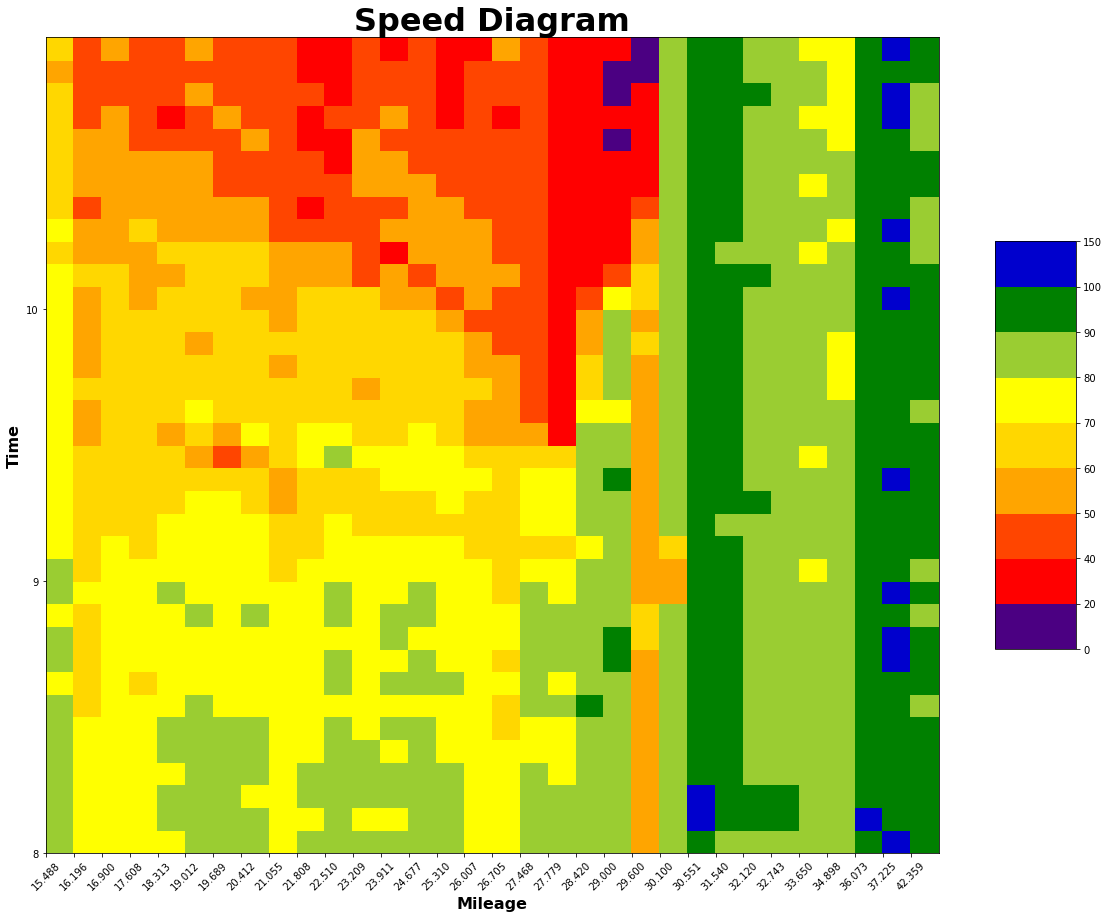

In [318]:
plot_heat(S,96,132)

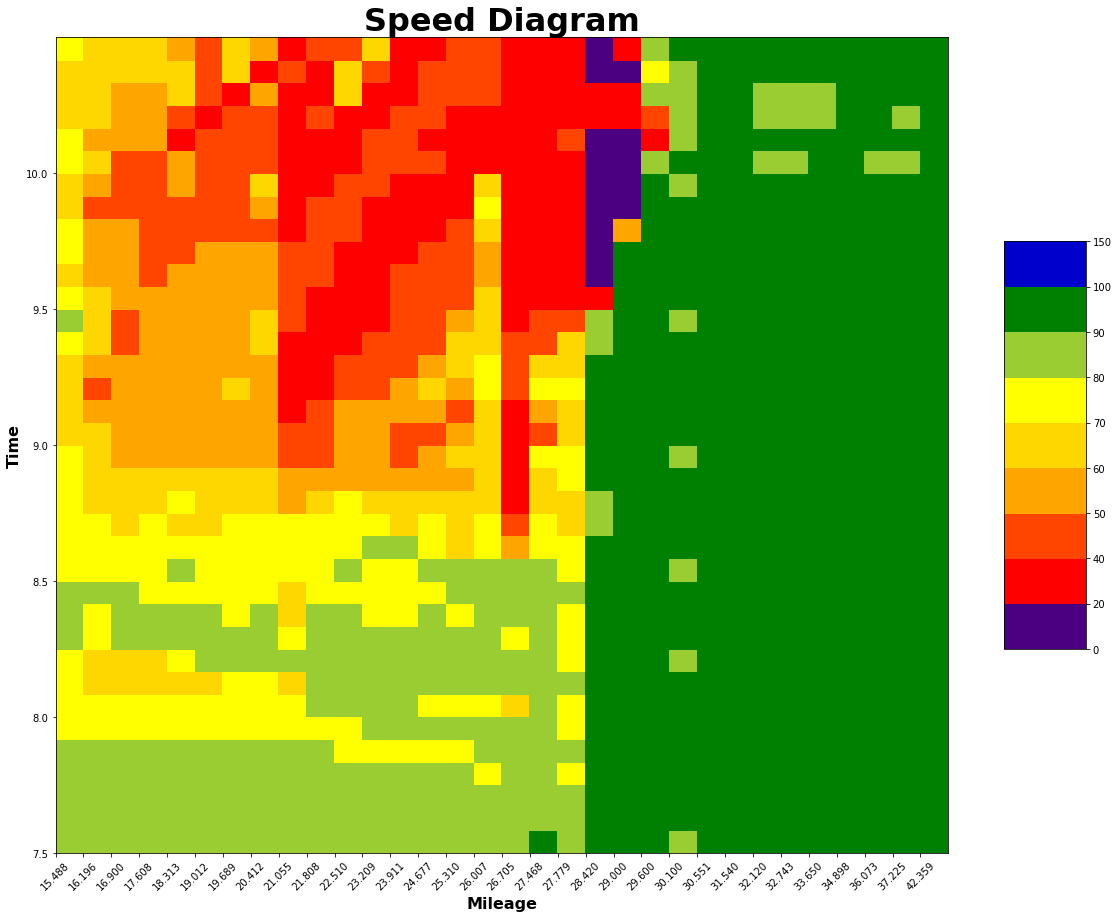

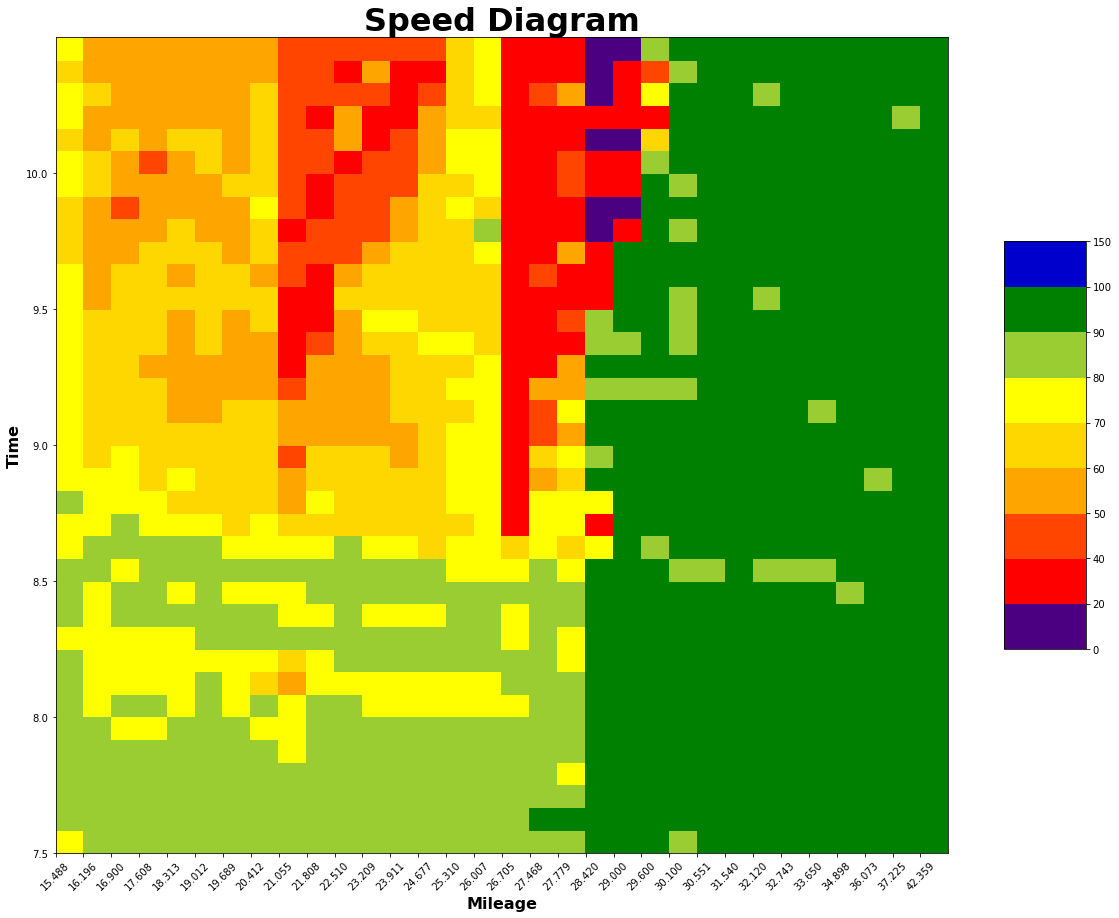

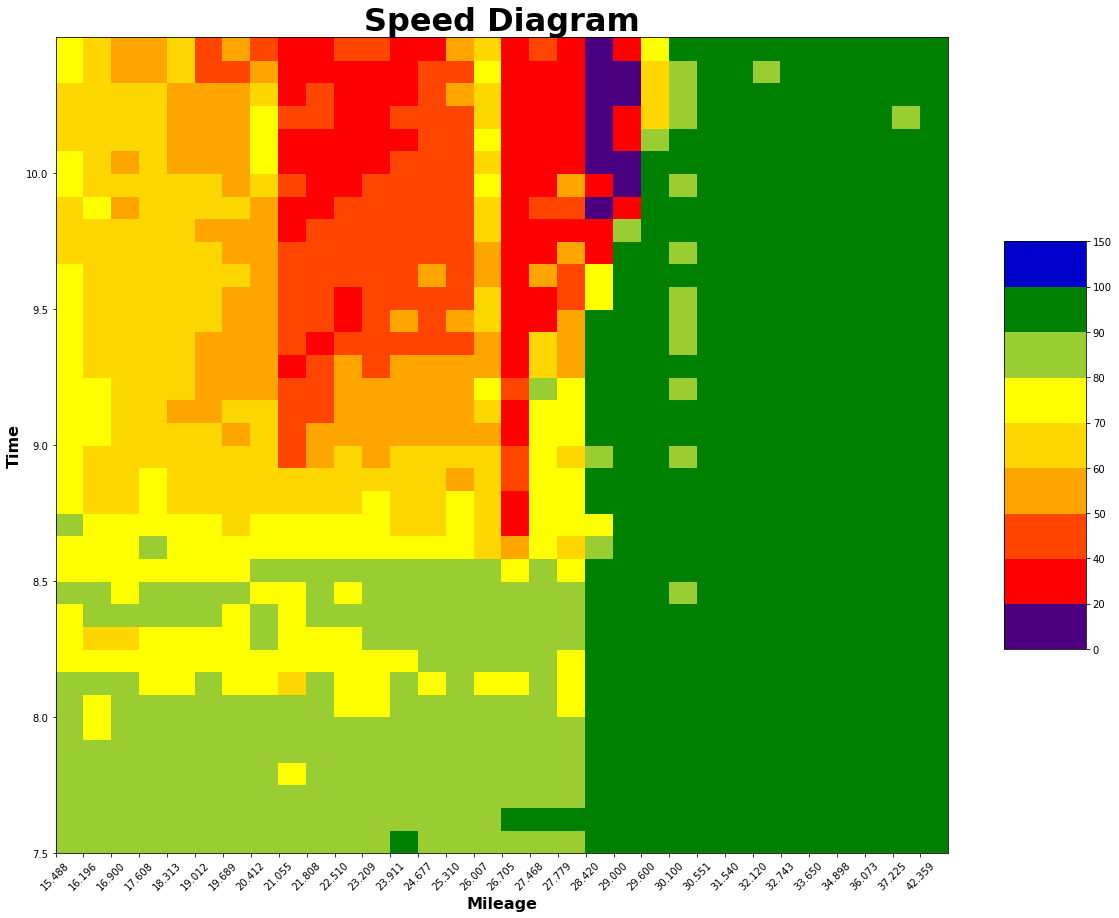

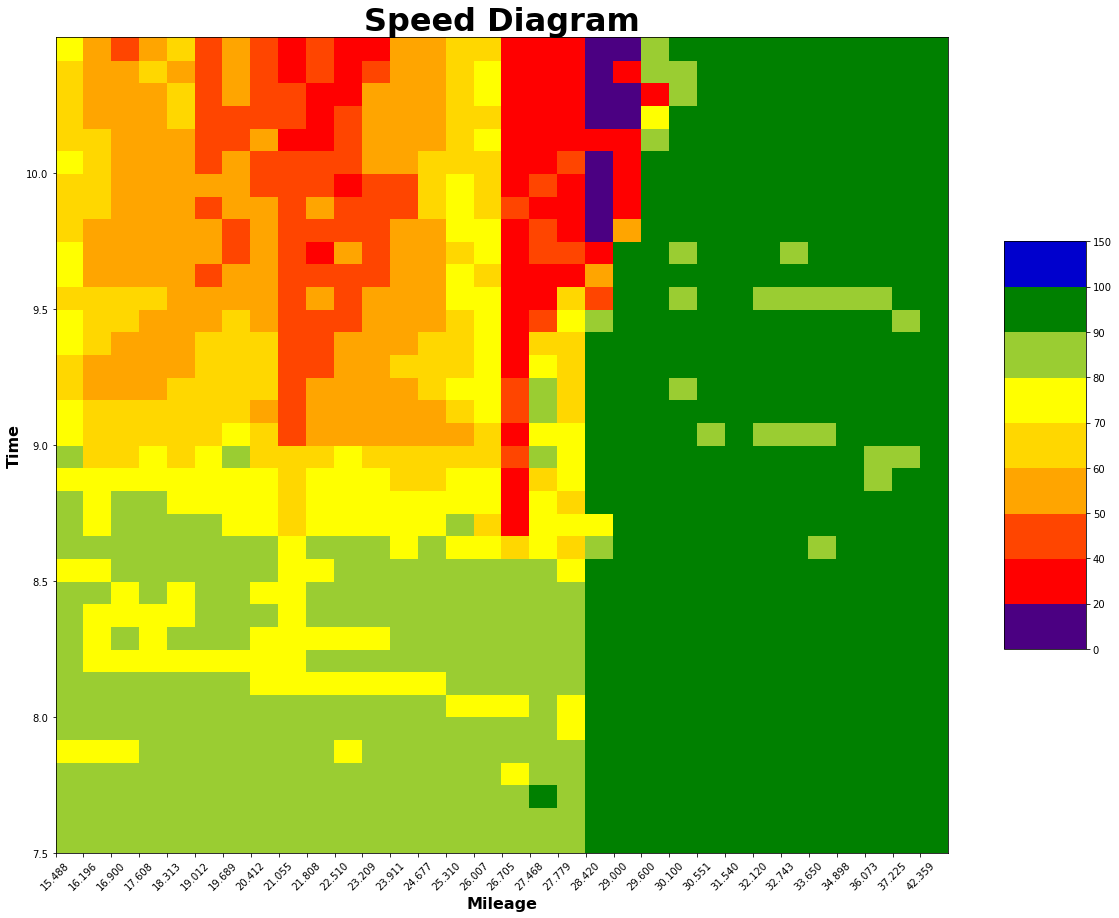

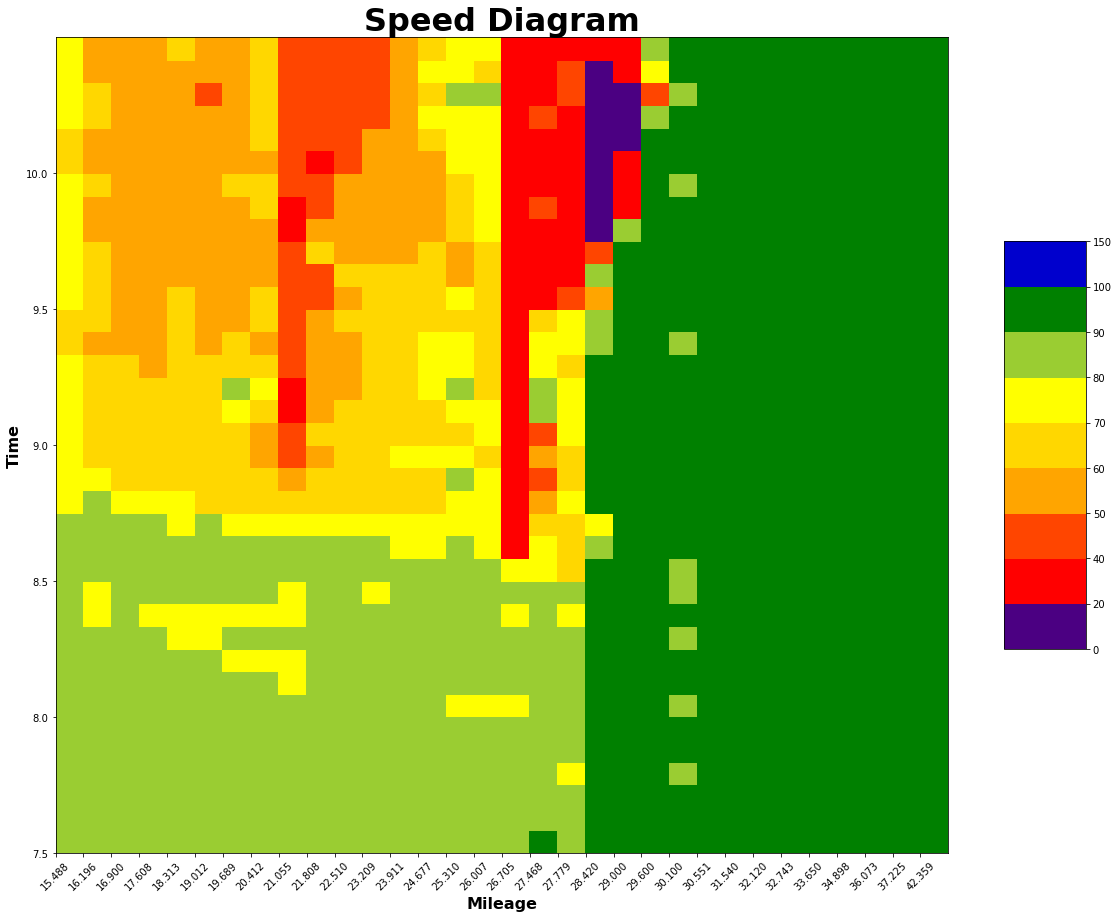

In [293]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,90,132)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [294]:
exp

,0,1,0,1,0,1,0,1,0,1
15.488,12.10,6.57,11.67,4.34,12.27,4.74,12.28,5.16,10.74,4.96
16.196,11.61,12.39,11.60,15.02,12.68,19.30,10.58,14.73,9.68,15.60
16.900,10.15,11.50,8.61,7.55,8.85,8.25,9.41,8.38,7.98,8.87
17.608,10.92,12.38,9.31,7.65,10.80,10.78,9.90,9.96,8.21,9.20
18.313,10.75,10.96,9.42,8.98,8.36,8.39,9.62,11.50,7.58,7.15
19.012,10.87,8.88,9.72,7.68,10.22,5.81,11.08,7.42,9.26,6.06
19.689,11.68,8.74,11.18,10.26,11.09,8.41,10.74,9.33,9.12,9.10
20.412,9.53,9.20,9.56,12.11,9.02,11.72,9.29,6.84,8.37,10.84
21.055,11.51,15.99,12.00,13.26,10.72,14.82,10.55,12.04,11.00,13.65
21.808,9.63,15.42,9.12,10.70,8.23,12.21,7.81,11.80,8.30,10.89


# 2020/11/15 3hr

In [319]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115_3\20201115fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115_3\20201115scal.csv")

In [296]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115_3\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,1140.0,84,16,192.0,100,0,564.0,98,2
1,756.0,92,8,114.0,84,16,648.0,94,6
2,924.0,91,9,186.0,90,10,552.0,98,2
3,432.0,89,11,102.0,94,6,660.0,96,4
4,744.0,100,0,126.0,95,5,540.0,96,4
5,804.0,94,6,228.0,95,5,588.0,96,4
6,636.0,92,8,90.0,100,0,540.0,100,0
7,780.0,94,6,108.0,100,0,504.0,98,2
8,1020.0,84,16,168.0,100,0,528.0,98,2
9,1032.0,85,15,240.0,98,2,576.0,100,0


In [297]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201115_3\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.80,1.00,0.0,0.76,1.00,0.0
1,0.81,1.00,0.0,0.81,1.00,0.0
2,0.63,0.75,0.0,0.73,1.00,0.0
3,0.76,0.50,0.0,0.44,1.00,0.0
4,0.73,0.67,0.0,0.81,0.00,0.0
5,0.84,0.00,0.0,0.78,1.00,0.0
6,0.84,1.00,0.0,0.49,1.00,0.0
7,0.87,0.00,0.0,0.85,1.00,0.0
8,0.66,0.75,0.0,0.89,1.00,0.0
9,0.80,1.00,0.0,0.64,0.62,0.0


In [298]:
set_vehinput(vehinp)
set_vehroute(routeratio)

95 2 3
95 3 2
97 1 2
89 10 1
91 8 1
93 6 1


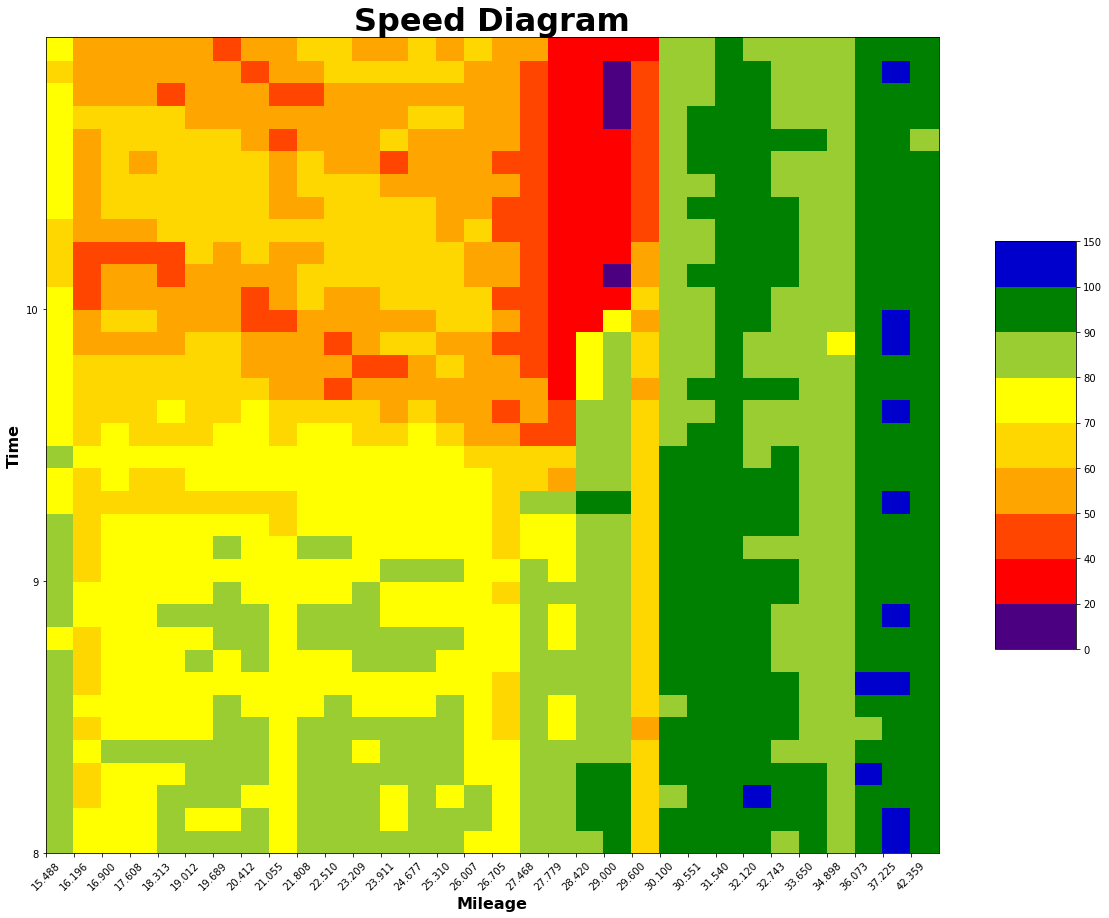

In [320]:
plot_heat(S,96,132)

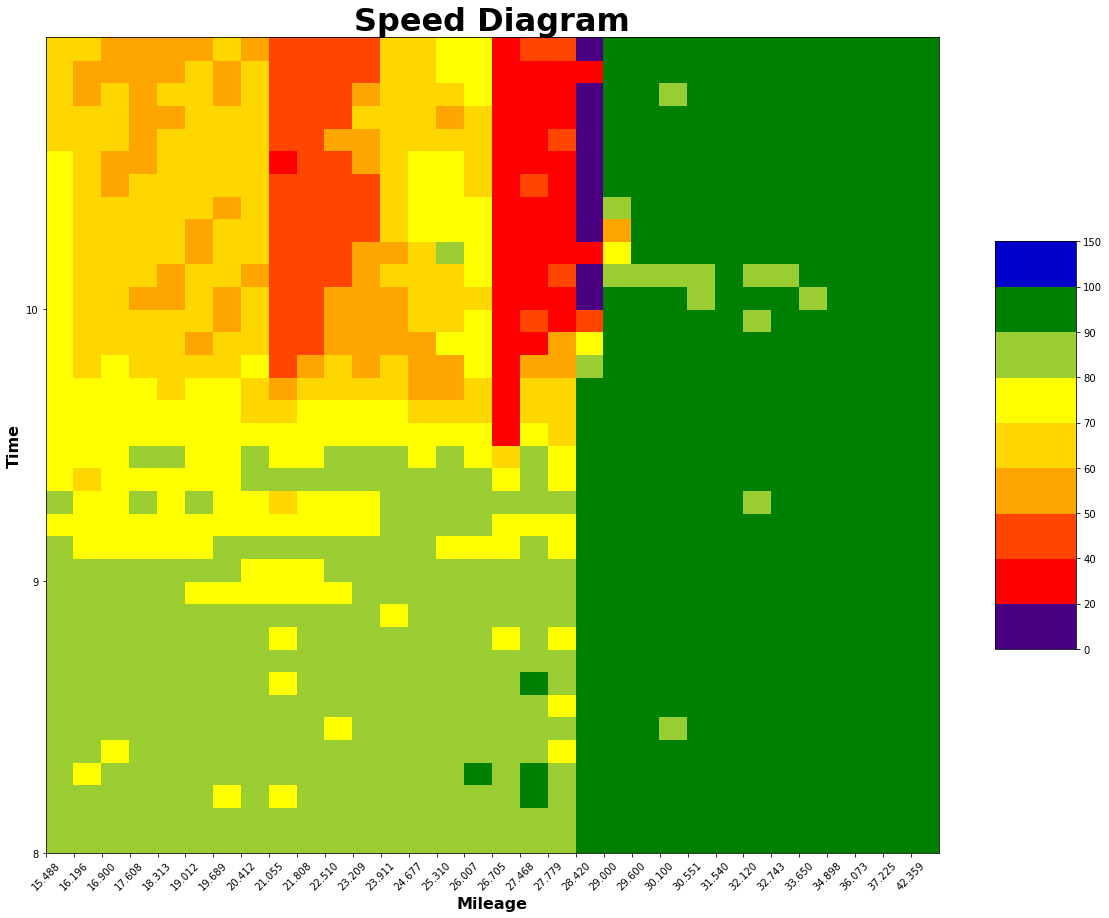

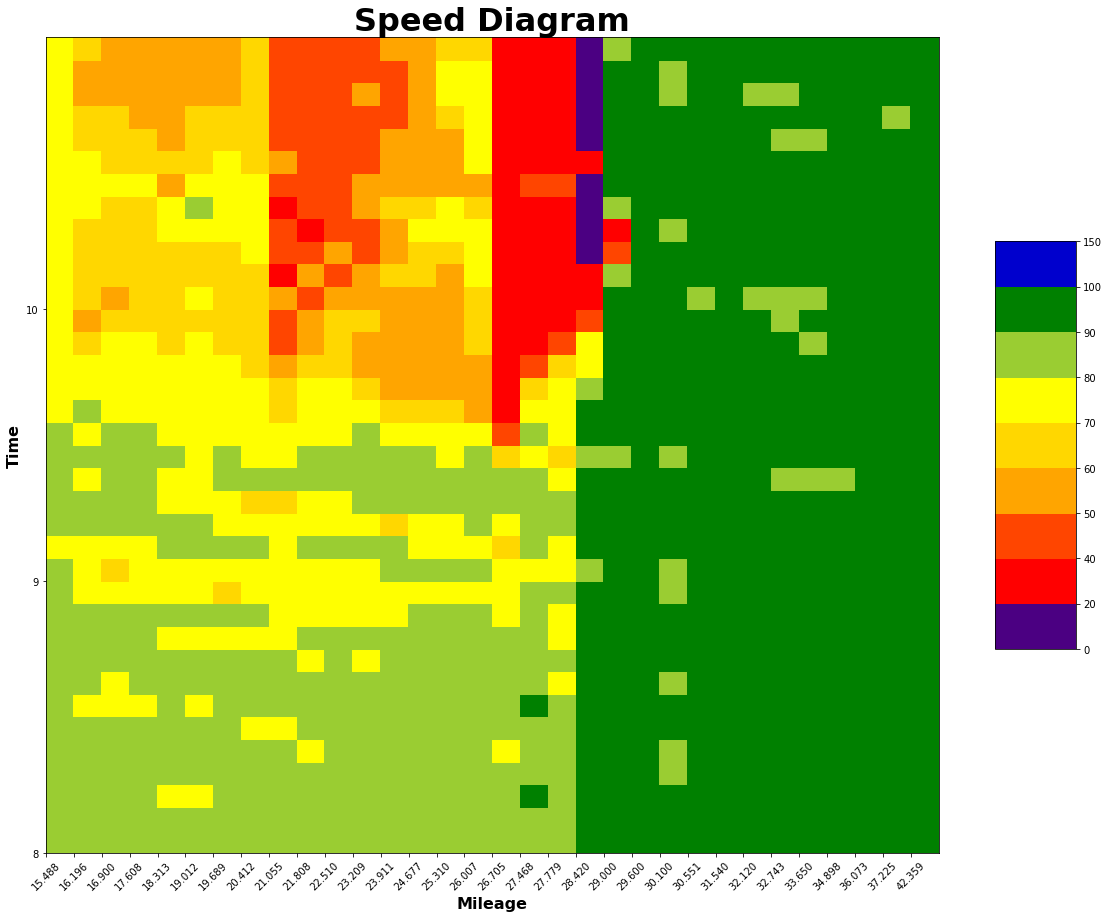

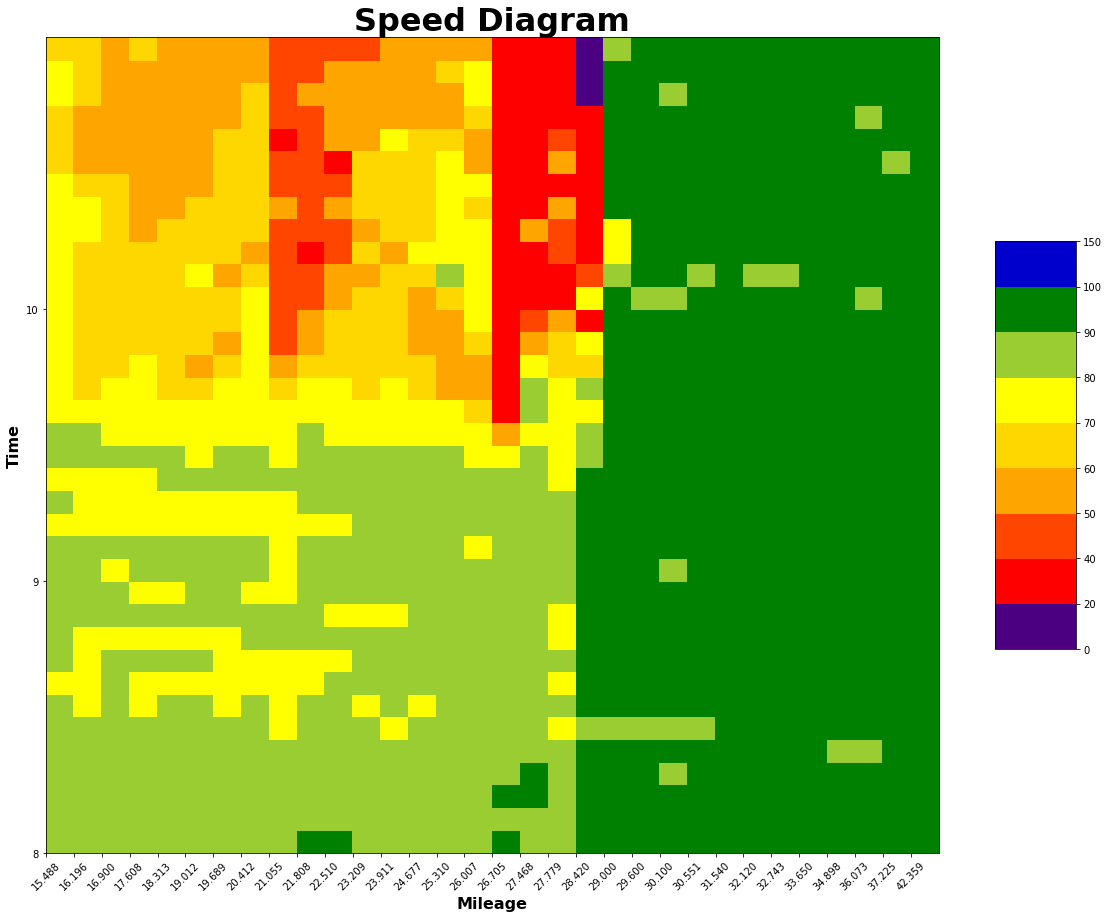

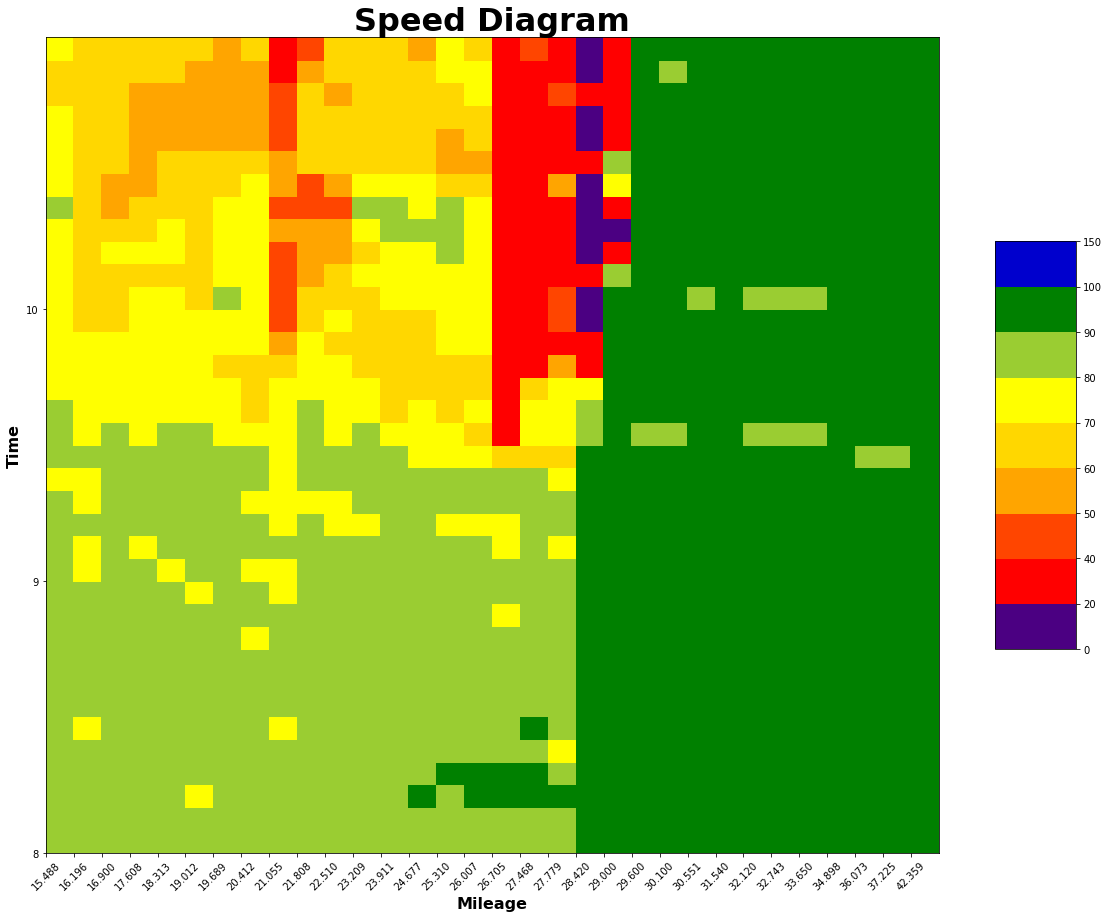

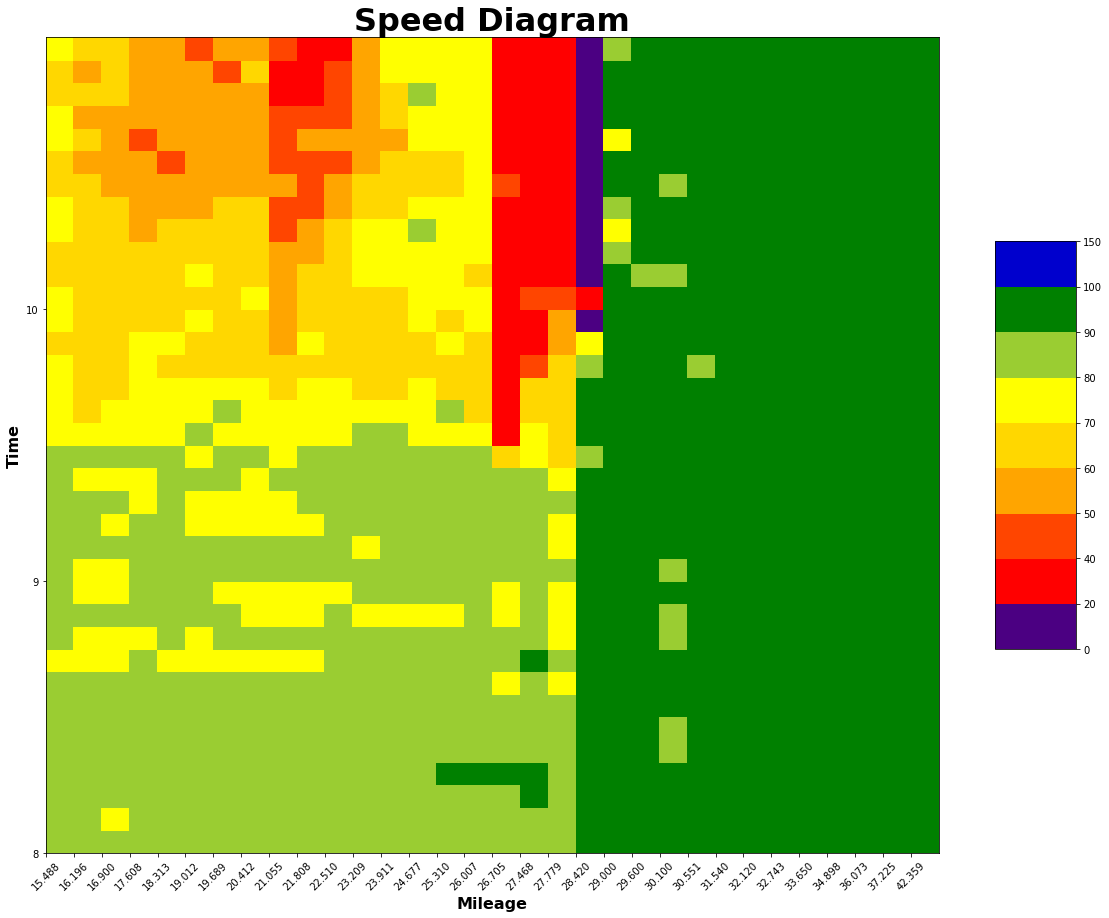

In [321]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,96,132)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

In [322]:
exp

,0,1,0,1,0,1,0,1,0,1
15.488,10.39,4.16,10.77,4.25,8.64,3.96,9.00,4.57,10.45,3.63
16.196,9.70,16.75,11.24,18.24,9.78,19.24,8.90,19.22,10.40,16.79
16.900,10.18,8.23,10.77,9.51,10.82,8.86,11.21,11.91,11.02,9.19
17.608,8.88,9.46,9.53,10.77,10.51,9.31,9.70,12.59,10.72,10.77
18.313,10.78,7.55,10.23,11.26,10.11,9.57,9.53,12.16,10.91,10.67
19.012,9.32,7.83,9.19,9.50,9.83,8.07,8.27,10.19,9.25,9.67
19.689,9.22,7.13,10.15,10.02,10.26,6.27,10.78,11.11,10.14,7.85
20.412,7.94,8.53,7.94,9.71,8.37,10.05,8.40,10.69,6.86,8.89
21.055,8.62,12.69,8.31,11.84,8.28,12.50,7.89,12.61,6.89,12.42
21.808,9.30,12.23,10.62,11.72,9.05,12.01,8.93,11.60,10.14,11.41


# 2020/11/14 3hr

In [332]:
F = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114_3\20201114fcal.csv")
S = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114_3\20201114scal.csv")

In [333]:
vehinp = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114_3\vehinputcomp.csv",encoding='Big5')
vehinp

,起點車輛數,起點小客車比例,起點大客車比例,頭城入口車輛數,頭城入口小客車比例,頭城入口大客車比例,宜蘭入口車輛數,宜蘭入口小客車比例,宜蘭入口大客車比例
0,1068.0,96,4,390.0,85,15,588.0,100,0
1,1836.0,89,11,258.0,93,7,636.0,100,0
2,1596.0,89,11,198.0,97,3,540.0,96,4
3,1164.0,94,6,336.0,95,5,528.0,100,0
4,948.0,92,8,252.0,98,2,768.0,94,6
5,1188.0,94,6,306.0,98,2,384.0,100,0
6,1524.0,97,3,378.0,95,5,624.0,77,23
7,1500.0,94,4,258.0,98,2,588.0,98,2
8,1428.0,97,3,222.0,97,3,972.0,96,4
9,1572.0,98,2,432.0,94,6,744.0,94,6


In [334]:
routeratio = pd.read_csv(r"C:\Users\hyang\Desktop\HYANG\vissim com\validation\新分段驗證\20201114_3\routeratio.csv",encoding='Big5')
routeratio

,頭城小客車未下匝道比例,頭城大客車未下匝道比例,頭城聯結車未下匝道比例,宜蘭小客車未下匝道比例,宜蘭大客車未下匝道比例,宜蘭聯結車未下匝道比例
0,0.90,1.00,0.0,0.74,0.75,0.0
1,0.79,0.80,0.0,0.82,0.94,0.0
2,0.76,1.00,0.0,0.73,0.93,0.0
3,0.84,1.00,0.0,0.68,0.00,0.0
4,0.83,0.50,0.0,0.49,1.00,0.0
5,0.86,0.00,0.0,0.81,1.00,0.0
6,0.77,1.00,0.0,0.83,1.00,0.0
7,0.75,0.14,0.0,0.71,1.00,1.0
8,0.76,0.43,0.0,0.69,1.00,0.0
9,0.78,0.75,0.0,0.71,1.00,0.0


In [336]:
set_vehinput(vehinp)
set_vehroute(routeratio)

94 4 2
91 7 2
93 6 1
89 10 1
87 12 1
88 10 2
81 17 2


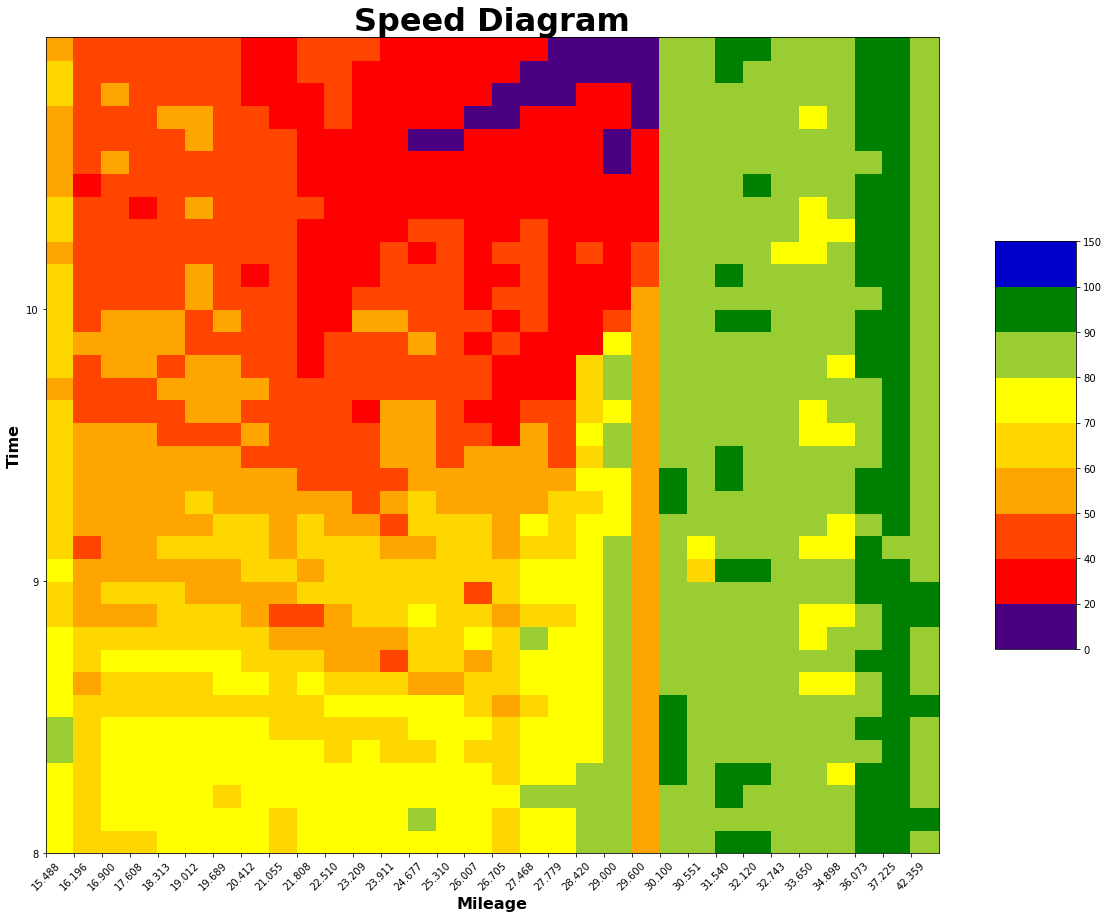

In [337]:
plot_heat(S,96,132)

In [338]:
exp = pd.DataFrame()
# Chose Random Seed
for i in range(5):
    Random_Seed = (50 + i*100)
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
    Vissim.Simulation.RunContinuous()

    f, s = load_vissim_data()
    f.columns = F.columns
    s.columns = S.columns
    F_mean = round(mape(F,f),4)*100
    S_mean = round(mape(S,s),4)*100
    plot_heat(s,96,132)
    exp = pd.concat([exp,F_mean,S_mean],axis=1)

KeyboardInterrupt: 

In [341]:
exp

,0,1
15.488,10.10,9.19
16.196,12.65,13.16
16.900,10.66,8.06
17.608,12.00,7.11
18.313,11.45,11.09
19.012,9.73,8.33
19.689,9.35,8.06
20.412,11.10,13.33
21.055,10.08,13.86
21.808,8.84,11.35
